In [1]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(dplyr)
library(patchwork)
library(ggplot2)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedi

In [2]:
obj = qs::qread('../00_preprocessing/_targets/objects/exp_labelled_neuron')
obj

Loading required package: SeuratObject

Attaching sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Loading required package: Seurat


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




An object of class Seurat 
59227 features across 107464 samples within 3 assays 
Active assay: SCT (26906 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [3]:
obj@meta.data = obj@meta.data %>% mutate(batch = stringr::str_replace_all(batch, stringr::fixed(" "), '__'))
obj@meta.data$group = interaction(obj@meta.data$treatment, obj@meta.data$time, obj@meta.data$strain, drop = TRUE)

In [4]:
head(obj@meta.data)

orig.ident nCount_RNA nFeature_RNA Index.10x nCount_HTO
GCAGCCACACAGCCAC_1_1 SI-TT-A11  69641      7356         SI-TT-A11 1532      
TGCTTGCAGTTCCGTA_1_1 SI-TT-A11  71825      7455         SI-TT-A11 1616      
TGCGGCACAGCATGCC_1_1 SI-TT-A11  65517      7244         SI-TT-A11 2197      
GAGGCAAGTACCTAAC_1_1 SI-TT-A11  68817      7344         SI-TT-A11 1884      
TAGCACATCACTGTTT_1_1 SI-TT-A11  70863      7560         SI-TT-A11 1771      
GTAATGCTCTGTCCCA_1_1 SI-TT-A11  69910      7425         SI-TT-A11 2555      
                     nFeature_HTO Index.HTO nCount_spliced nFeature_spliced
GCAGCCACACAGCCAC_1_1 12           D706       9837          3757            
TGCTTGCAGTTCCGTA_1_1 12           D706       8834          3443            
TGCGGCACAGCATGCC_1_1 12           D706       8779          3410            
GAGGCAAGTACCTAAC_1_1 12           D706       8246          3326            
TAGCACATCACTGTTT_1_1 12           D706       9612          3747            
GTAATGCTCTGTCCCA_1_1 12           D706      10497          3727            
                     nCount_unspliced ⋯ strain treatment time  collection_date
GCAGCCACACAGCCAC_1_1 59804            ⋯ obob   FGF1      Day5  220329         
TGCTTGCAGTTCCGTA_1_1 62991            ⋯ obob   Veh_PF    Day14 220201         
TGCGGCACAGCATGCC_1_1 56738            ⋯ BL6    Veh_PF    Day5  220329         
GAGGCAAGTACCTAAC_1_1 60571            ⋯ obob   Veh_PF    Day14 220201         
TAGCACATCACTGTTT_1_1 61251            ⋯ BL6    Veh_PF    Day5  220329         
GTAATGCTCTGTCCCA_1_1 59413            ⋯ obob   FGF1      Day5  211213         
                     isolation_date batch    predicted.id prediction.score.max
GCAGCCACACAGCCAC_1_1 22/6/2022      Batch__1 Nr5a1_Bdnf   1.0000000           
TGCTTGCAGTTCCGTA_1_1 22/6/2022      Batch__1 Unassigned1  0.8065577           
TGCGGCACAGCATGCC_1_1 22/6/2022      Batch__1 Nr5a1_Bdnf   1.0000000           
GAGGCAAGTACCTAAC_1_1 22/6/2022      Batch__1 Unassigned1  0.8525726           
TAGCACATCACTGTTT_1_1 22/6/2022      Batch__1 Sst_Pthlh    0.6754849           
GTAATGCTCTGTCCCA_1_1 22/6/2022      Batch__1 Hdc          1.0000000           
                     labels          group            
GCAGCCACACAGCCAC_1_1 Nr5a1_Bdnf      FGF1.Day5.obob   
TGCTTGCAGTTCCGTA_1_1 Unassigned1     Veh_PF.Day14.obob
TGCGGCACAGCATGCC_1_1 Nr5a1_Bdnf      Veh_PF.Day5.BL6  
GAGGCAAGTACCTAAC_1_1 Unassigned1     Veh_PF.Day14.obob
TAGCACATCACTGTTT_1_1 Sst_Pthlh-Ghrh  Veh_PF.Day5.BL6  
GTAATGCTCTGTCCCA_1_1 Gm8773_Tac1-Hdc FGF1.Day5.obob

In [5]:
sce = as.SingleCellExperiment(obj)
sce

class: SingleCellExperiment 
dim: 26906 107464 
metadata(0):
assays(2): counts logcounts
rownames(26906): ENSMUSG00000089699 ENSMUSG00000104238 ...
  ENSMUSG00000095263 LOC665290
rowData names(0):
colnames(107464): GCAGCCACACAGCCAC_1_1 TGCTTGCAGTTCCGTA_1_1 ...
  TGGAGGAAGCGGTAGT_5_3 TGATTCTGTGCCGTTG_5_3
colData names(36): orig.ident nCount_RNA ... group ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(2): RNA integrated

In [6]:
# reducedDim(sce, "PCA", withDimnames=TRUE) <- obj[['pca']]@cell.embeddings

In [7]:
# sce <- runUMAP(sce, dimred='PCA', name = 'UMAP', n_dimred = 30)

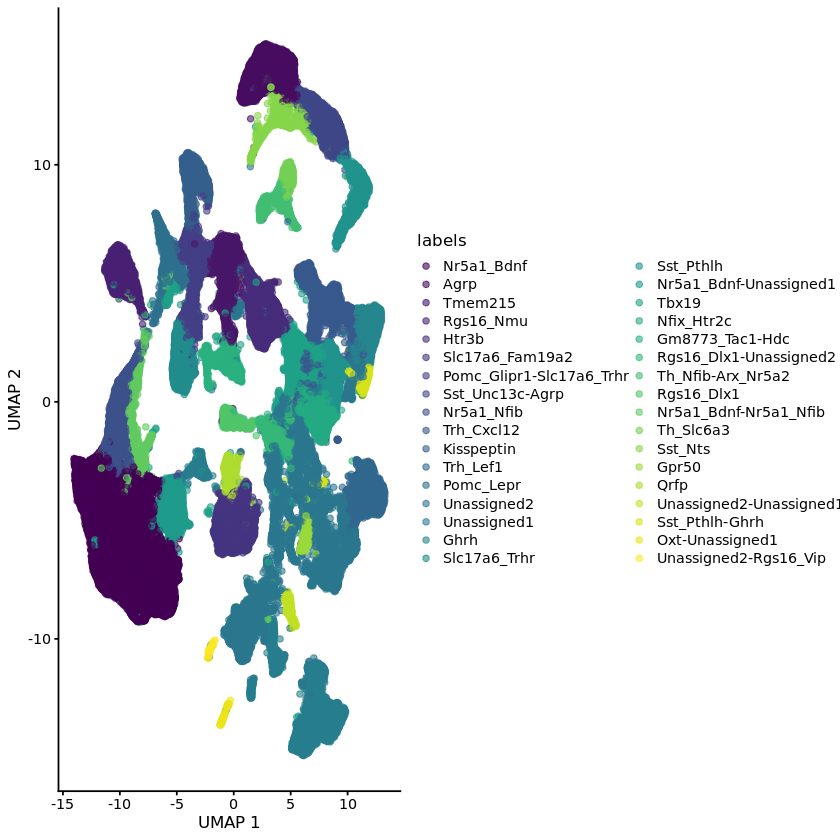

In [8]:
plotReducedDim(sce, colour_by = 'labels', dimred='UMAP', )

In [9]:
obob_milo <- Milo(sce)

#build KNN graph
obob_milo <- buildGraph(obob_milo, k=40, d=30, reduced.dim = 'PCA')

#define neighbourhoods
obob_milo <- makeNhoods(obob_milo, prop = 0.1, k= 40, d=30, refined = T, reduced_dims = 'PCA')

Constructing kNN graph with k:40

Checking valid object

Running refined sampling with reduced_dim



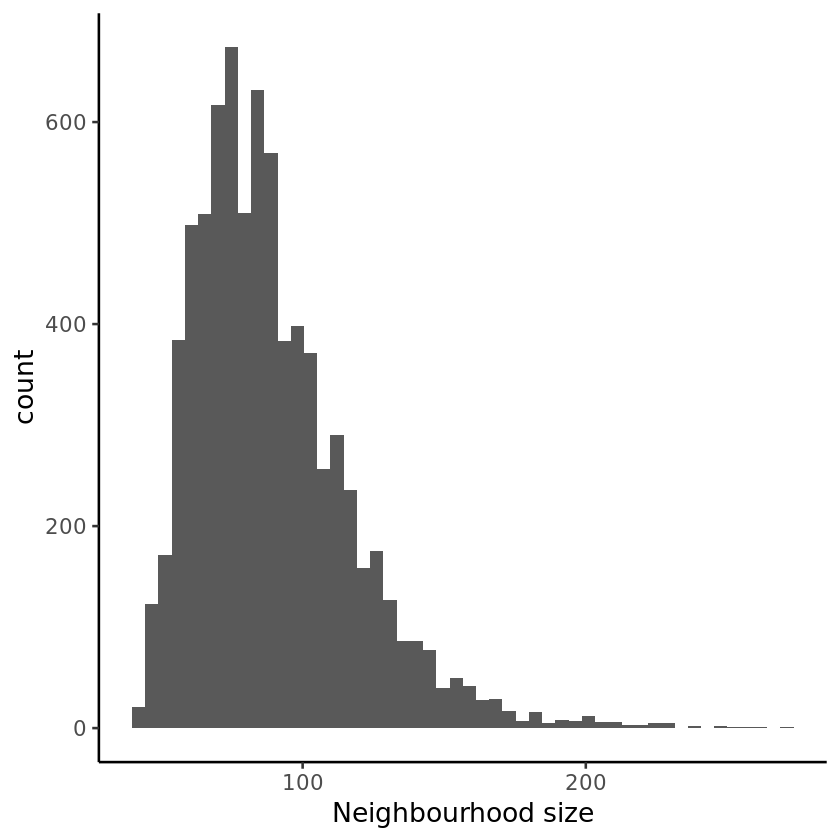

In [10]:
#plot neighbourhood sizes to check if we used appropriate k for graph building
  #we want to have an average size over 5 x N_samples
  #we have 171 samples - but not all samples will be in all neighbourhoods because of age variance
plotNhoodSizeHist(obob_milo)

Checking meta.data validity

Counting cells in neighbourhoods



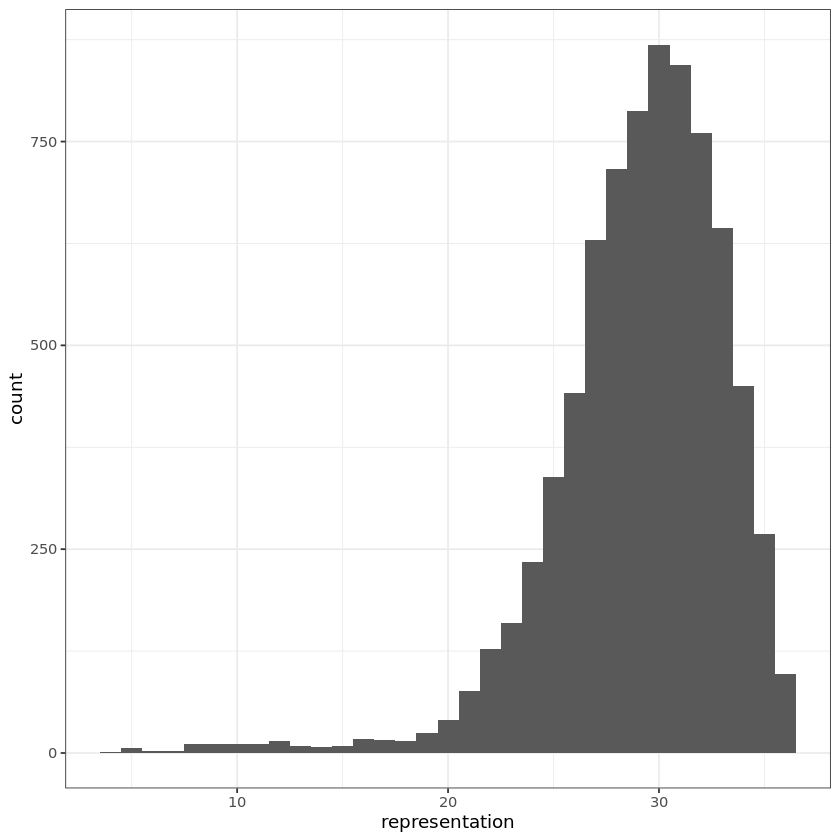

In [11]:
#add a n x m matrix to the milo object with number of neighbourhodds and samples
obob_milo <- countCells(obob_milo, meta.data = as.data.frame(colData(obob_milo)), sample = 'hash.mcl.ID')

#calculate sample representation in each neighbourhood
cell_counts <- as.data.frame(nhoodCounts(obob_milo)) %>% mutate(representation = rowSums(.>0))

#view distribution of N_samples in each neigbourhood
ggplot(cell_counts, aes(x = representation)) + 
  geom_histogram(binwidth = 1) + theme_bw()

#most neighbourhoods have 30-60 samples in them

In [12]:
obob_design <- data.frame(colData(obob_milo))[, c('hash.mcl.ID', 'group', 'batch', "strain")]
#convert seq-pool to factor
obob_design$batch <- as.factor(obob_design$batch)
#keep unique rows
obob_design <- distinct(obob_design)
#change rownames
rownames(obob_design) <- obob_design$hash.mcl.ID
head(obob_design)

hash.mcl.ID group             batch    strain
M9 M9          FGF1.Day5.obob    Batch__1 obob  
J2 J2          Veh_PF.Day14.obob Batch__1 obob  
M2 M2          Veh_PF.Day5.BL6   Batch__1 BL6   
N7 N7          FGF1.Day5.obob    Batch__1 obob  
M8 M8          Veh_PF.Day5.obob  Batch__1 obob  
N8 N8          Veh_PF.Day5.obob  Batch__1 obob

In [13]:
print(obob_design)

    hash.mcl.ID             group    batch strain
M9           M9    FGF1.Day5.obob Batch__1   obob
J2           J2 Veh_PF.Day14.obob Batch__1   obob
M2           M2   Veh_PF.Day5.BL6 Batch__1    BL6
N7           N7    FGF1.Day5.obob Batch__1   obob
M8           M8  Veh_PF.Day5.obob Batch__1   obob
N8           N8  Veh_PF.Day5.obob Batch__1   obob
M13         M13   FGF1.Day14.obob Batch__1   obob
M18         M18  Veh_PF.Day14.BL6 Batch__1    BL6
M17         M17  Veh_PF.Day14.BL6 Batch__1    BL6
M24         M24 Veh_PF.Day14.obob Batch__1   obob
J11         J11   FGF1.Day14.obob Batch__1   obob
M4           M4   Veh_PF.Day5.BL6 Batch__1    BL6
J16         J16   FGF1.Day14.obob Batch__2   obob
M11         M11  Veh_PF.Day5.obob Batch__2   obob
M5           M5   Veh_PF.Day5.BL6 Batch__2    BL6
M23         M23   FGF1.Day14.obob Batch__2   obob
N17         N17    FGF1.Day5.obob Batch__2   obob
M19         M19  Veh_PF.Day14.BL6 Batch__2    BL6
M25         M25 Veh_PF.Day14.obob Batch__2   obob


In [14]:
length(unique(obob_design$group))

[1] 6

In [15]:
dput(unique(obob_design$group))

structure(c(5L, 4L, 2L, 6L, 3L, 1L), .Label = c("Veh_PF.Day14.BL6", 
"Veh_PF.Day5.BL6", "FGF1.Day14.obob", "Veh_PF.Day14.obob", "FGF1.Day5.obob", 
"Veh_PF.Day5.obob"), class = "factor")


In [ ]:
# store distances to nearest neighbours
# obob_milo <- calcNhoodDistance(obob_milo, d=30, reduced.dim = 'PCA')
# qs::qsave(obob_milo, 'obob_milo_neuron_all.qs')
obob_milo = qs::qread('obob_milo_neuron_all.qs')

In [133]:
# contrast.all = c("groupFGF1.Day5-groupVeh_PF.Day5")
model <- model.matrix(~0 + group + batch, data=obob_design)
# mod.contrast <- makeContrasts(contrasts=contrast.all, levels=model)
head(model)

groupVeh_PF.Day14.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob groupVeh_PF.Day14.obob groupFGF1.Day5.obob
M9 0                     0                    0                    0                      1                  
J2 0                     0                    0                    1                      0                  
M2 0                     1                    0                    0                      0                  
N7 0                     0                    0                    0                      1                  
M8 0                     0                    0                    0                      0                  
N8 0                     0                    0                    0                      0                  
   groupVeh_PF.Day5.obob batchBatch__2 batchBatch__3
M9 0                     0             0            
J2 0                     0             0            
M2 0                     0             0            
N7 0                     0             0            
M8 1                     0             0            
N8 1                     0             0

In [134]:
options(width=120) 
print(model)

    groupVeh_PF.Day14.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob groupVeh_PF.Day14.obob groupFGF1.Day5.obob
M9                      0                    0                    0                      0                   1
J2                      0                    0                    0                      1                   0
M2                      0                    1                    0                      0                   0
N7                      0                    0                    0                      0                   1
M8                      0                    0                    0                      0                   0
N8                      0                    0                    0                      0                   0
M13                     0                    0                    1                      0                   0
M18                     1                    0                    0                      0                   0
M

In [135]:
print(mod.contrast)

ERROR: Error in print(mod.contrast): object 'mod.contrast' not found


In [684]:
# da_results <- testNhoods(obob_milo, design = model, design.df = obob_design) #works!
da_results <- testNhoods(obob_milo, design = model, design.df = obob_design, 
                         model.contrasts = c("groupFGF1.Day5.obob - groupVeh_PF.Day5.obob"))

da_results %>%
  arrange(SpatialFDR) %>%
  head()

table(da_results$FDR < 0.1)

Using TMM normalisation

Performing spatial FDR correction withk-distance weighting



logFC    logCPM   F        PValue       FDR          Nhood SpatialFDR  
2770 5.970893 7.641636 42.01095 1.397235e-09 1.068745e-05 2770  1.682186e-05
479  5.792999 7.513468 35.74340 2.241613e-08 8.573049e-05  479  1.417073e-04
2796 3.965619 7.869305 32.03635 7.399734e-08 1.886686e-04 2796  2.688649e-04
4152 4.180807 7.569726 28.52639 3.417283e-07 6.534699e-04 4152  9.752101e-04
477  3.415495 7.850624 26.50198 8.090074e-07 8.840140e-04  477  1.184243e-03
2035 3.278266 7.976403 26.91226 7.371778e-07 8.840140e-04 2035  1.184243e-03


FALSE  TRUE 
 7488   161 

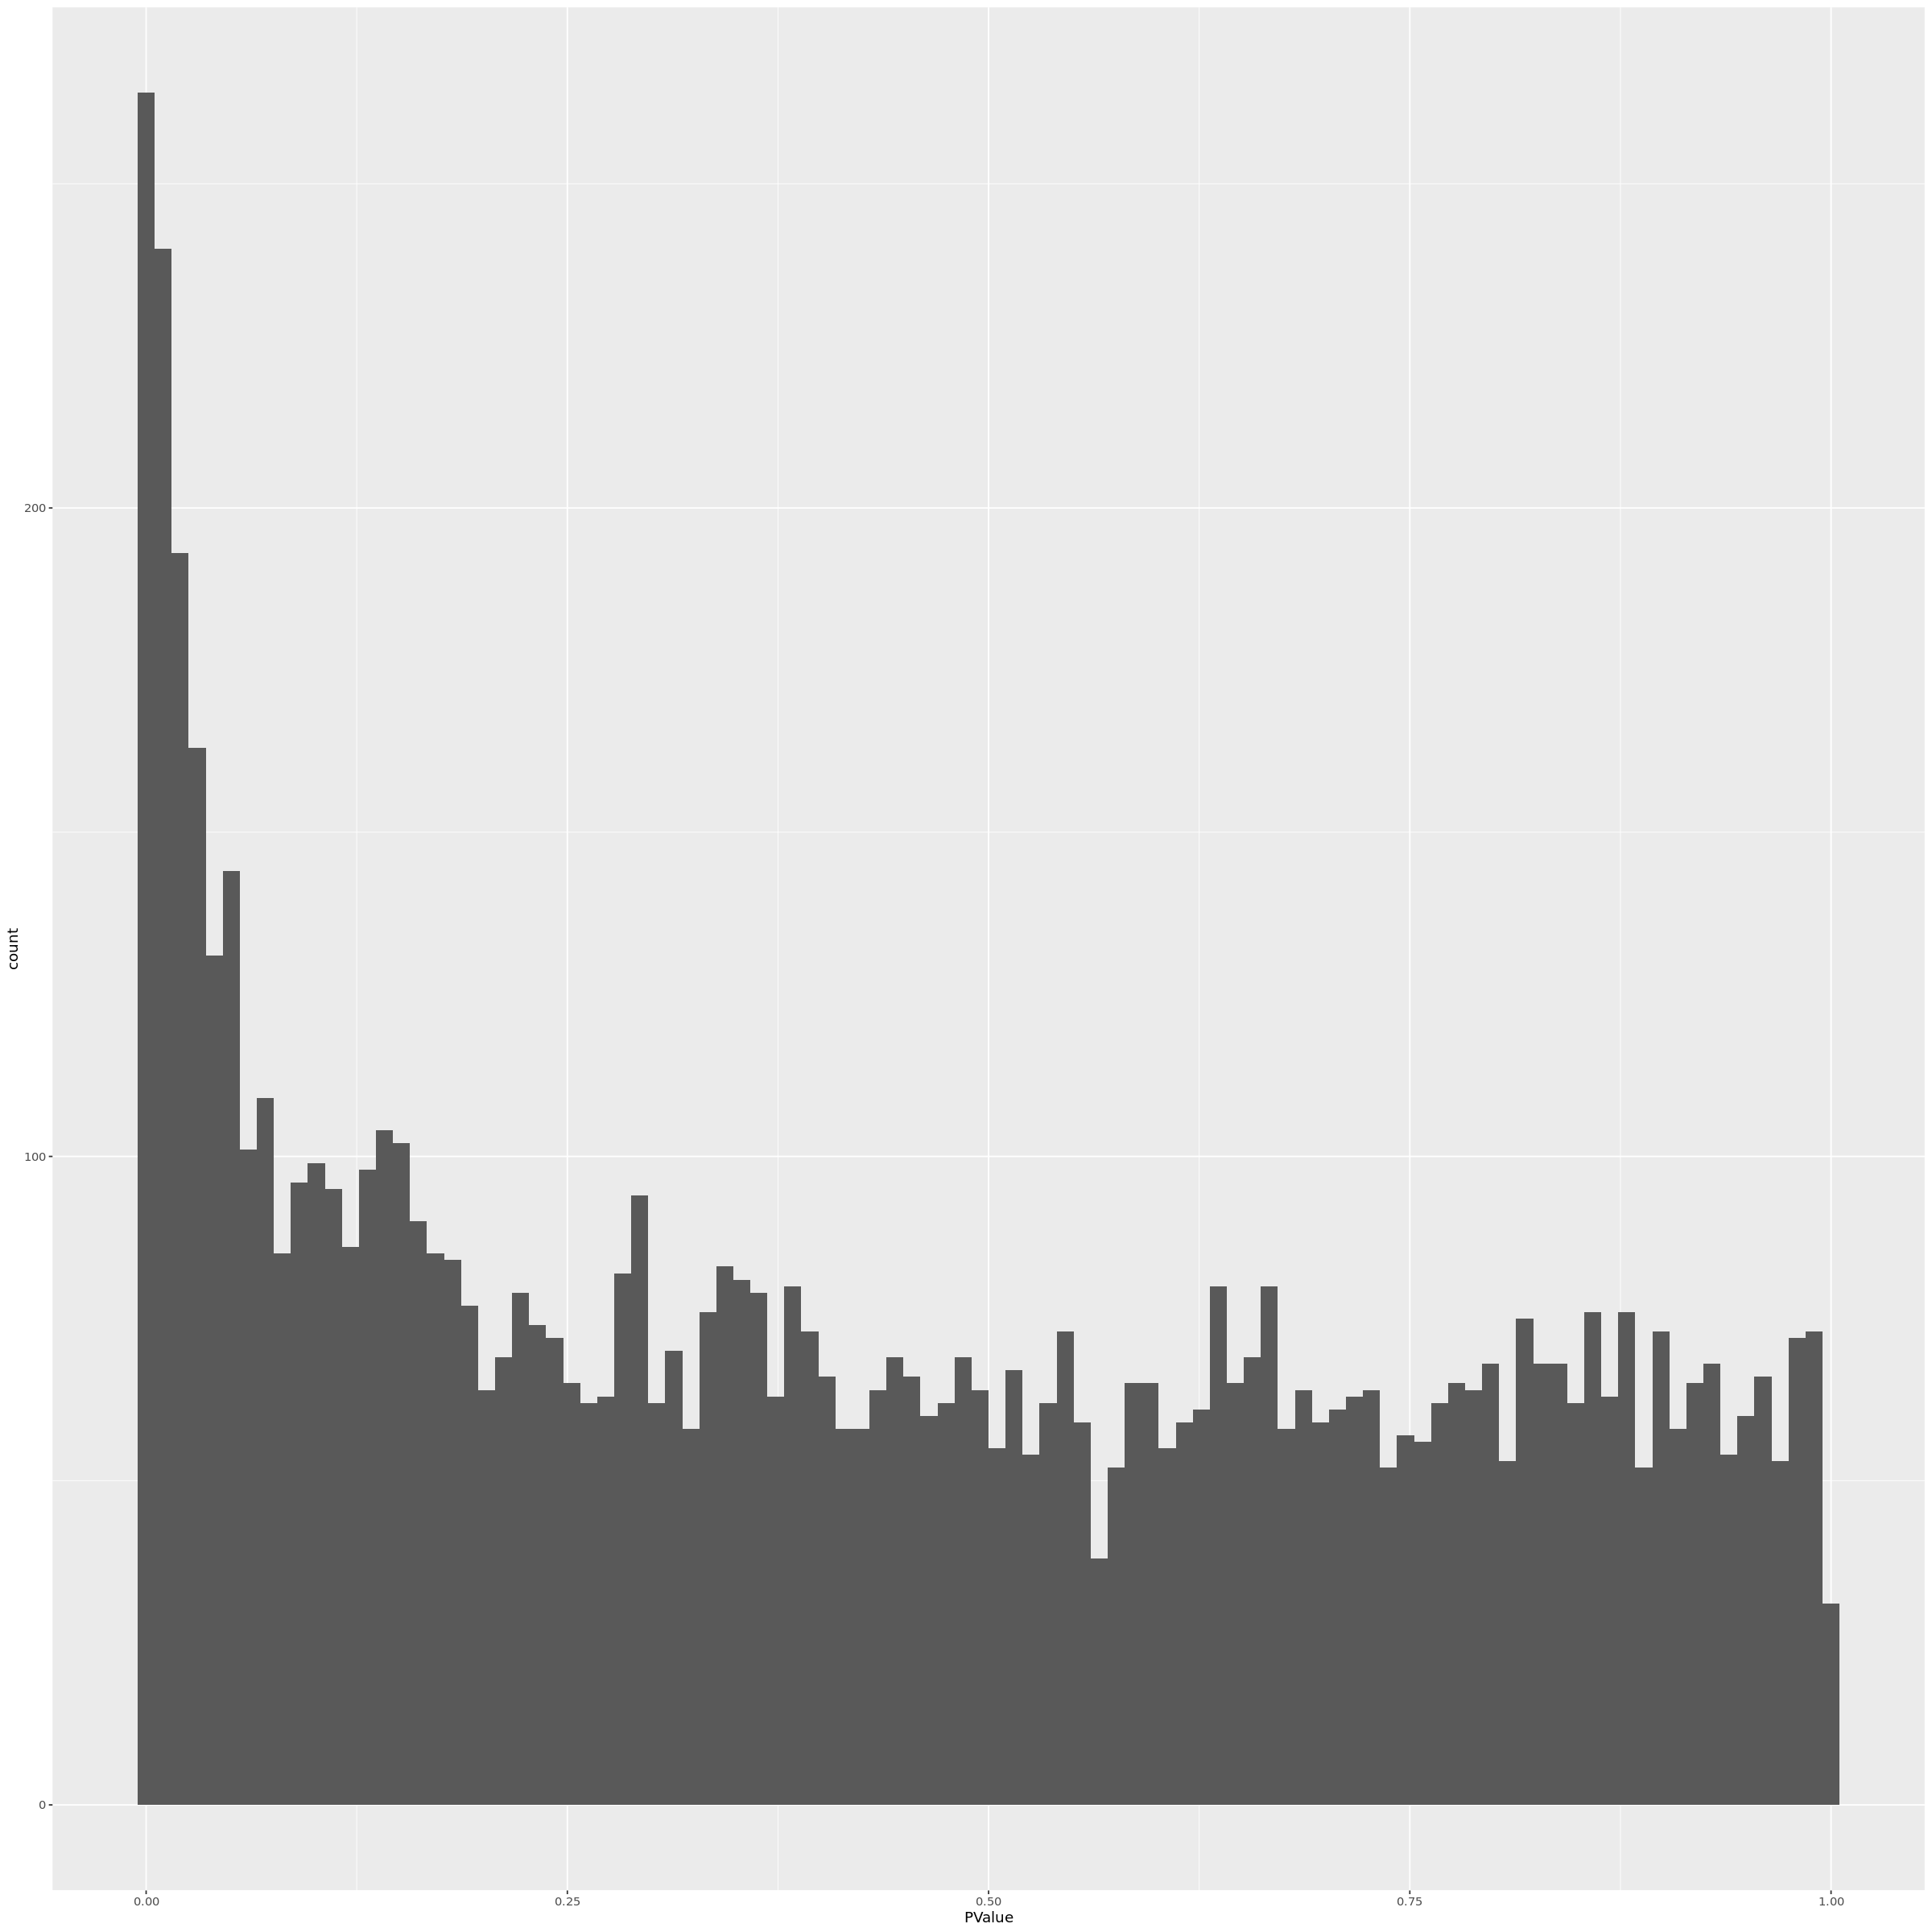

In [685]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=100)

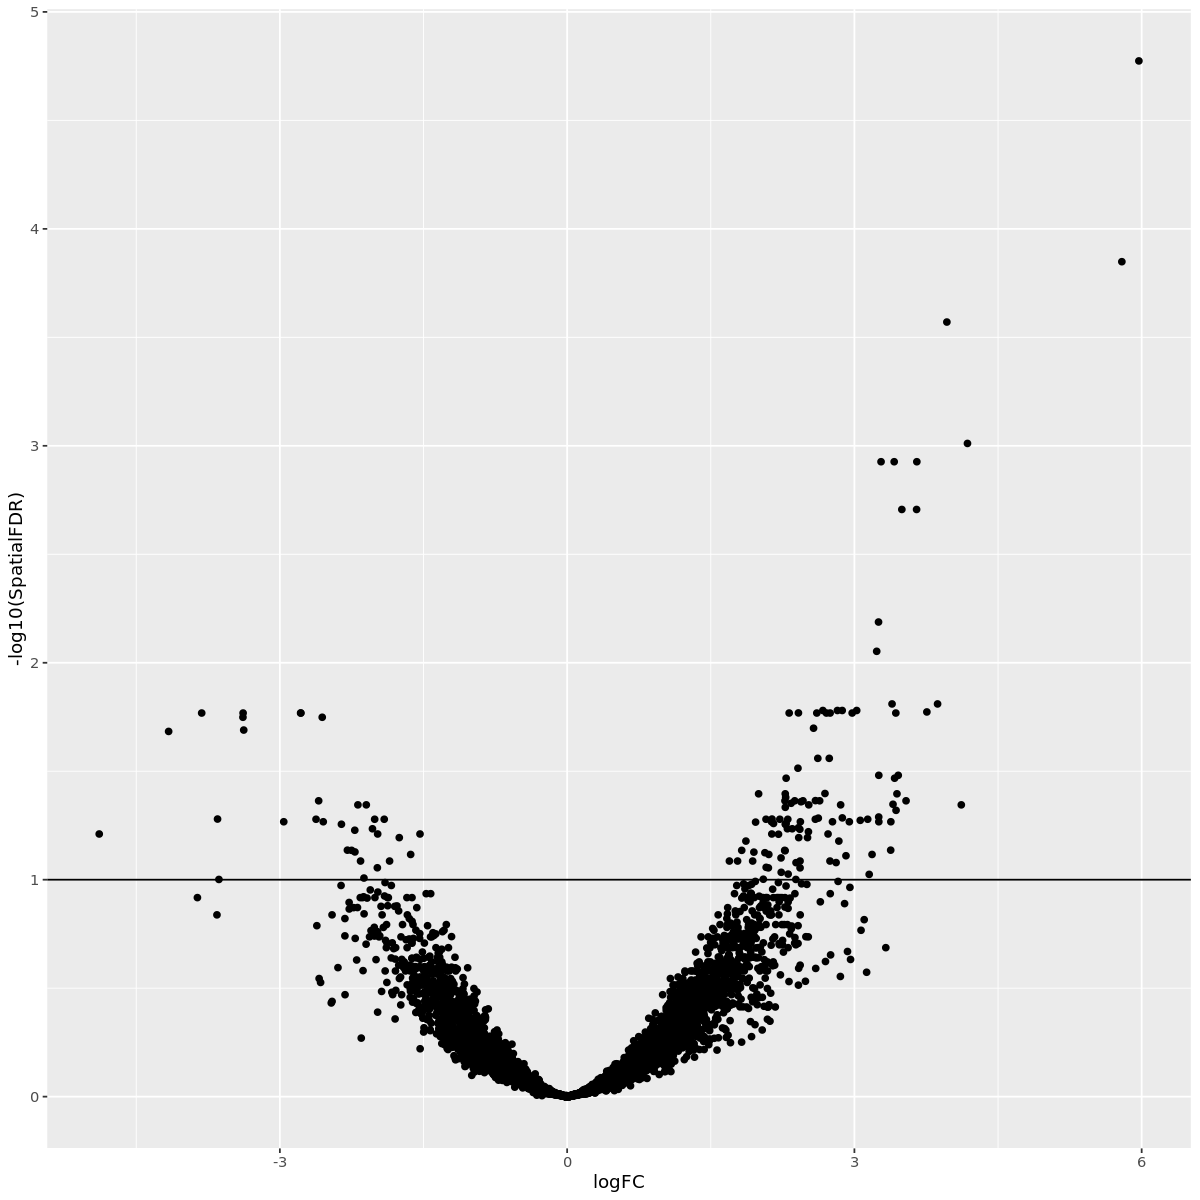

In [686]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

In [687]:
obob_milo <- buildNhoodGraph(obob_milo)

In [688]:
head(data.frame(colData(obob_milo)))

orig.ident nCount_RNA nFeature_RNA Index.10x nCount_HTO nFeature_HTO Index.HTO nCount_spliced
GCAGCCACACAGCCAC_1_1 SI-TT-A11  69641      7356         SI-TT-A11 1532       12           D706       9837         
TGCTTGCAGTTCCGTA_1_1 SI-TT-A11  71825      7455         SI-TT-A11 1616       12           D706       8834         
TGCGGCACAGCATGCC_1_1 SI-TT-A11  65517      7244         SI-TT-A11 2197       12           D706       8779         
GAGGCAAGTACCTAAC_1_1 SI-TT-A11  68817      7344         SI-TT-A11 1884       12           D706       8246         
TAGCACATCACTGTTT_1_1 SI-TT-A11  70863      7560         SI-TT-A11 1771       12           D706       9612         
GTAATGCTCTGTCCCA_1_1 SI-TT-A11  69910      7425         SI-TT-A11 2555       12           D706      10497         
                     nFeature_spliced nCount_unspliced ⋯ treatment time  collection_date isolation_date batch   
GCAGCCACACAGCCAC_1_1 3757             59804            ⋯ FGF1      Day5  220329          22/6/2022      Batch__1
TGCTTGCAGTTCCGTA_1_1 3443             62991            ⋯ Veh_PF    Day14 220201          22/6/2022      Batch__1
TGCGGCACAGCATGCC_1_1 3410             56738            ⋯ Veh_PF    Day5  220329          22/6/2022      Batch__1
GAGGCAAGTACCTAAC_1_1 3326             60571            ⋯ Veh_PF    Day14 220201          22/6/2022      Batch__1
TAGCACATCACTGTTT_1_1 3747             61251            ⋯ Veh_PF    Day5  220329          22/6/2022      Batch__1
GTAATGCTCTGTCCCA_1_1 3727             59413            ⋯ FGF1      Day5  211213          22/6/2022      Batch__1
                     predicted.id prediction.score.max labels          group             ident
GCAGCCACACAGCCAC_1_1 Nr5a1_Bdnf   1.0000000            Nr5a1_Bdnf      FGF1.Day5.obob    0    
TGCTTGCAGTTCCGTA_1_1 Unassigned1  0.8065577            Unassigned1     Veh_PF.Day14.obob 17   
TGCGGCACAGCATGCC_1_1 Nr5a1_Bdnf   1.0000000            Nr5a1_Bdnf      Veh_PF.Day5.BL6   0    
GAGGCAAGTACCTAAC_1_1 Unassigned1  0.8525726            Unassigned1     Veh_PF.Day14.obob 28   
TAGCACATCACTGTTT_1_1 Sst_Pthlh    0.6754849            Sst_Pthlh-Ghrh  Veh_PF.Day5.BL6   47   
GTAATGCTCTGTCCCA_1_1 Hdc          1.0000000            Gm8773_Tac1-Hdc FGF1.Day5.obob    27

In [689]:
options(repr.plot.width=10, repr.plot.height=10)
umap_pl <- plotReducedDim(obob_milo, dimred = "UMAP", colour_by="labels", text_by = "labels", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none") 

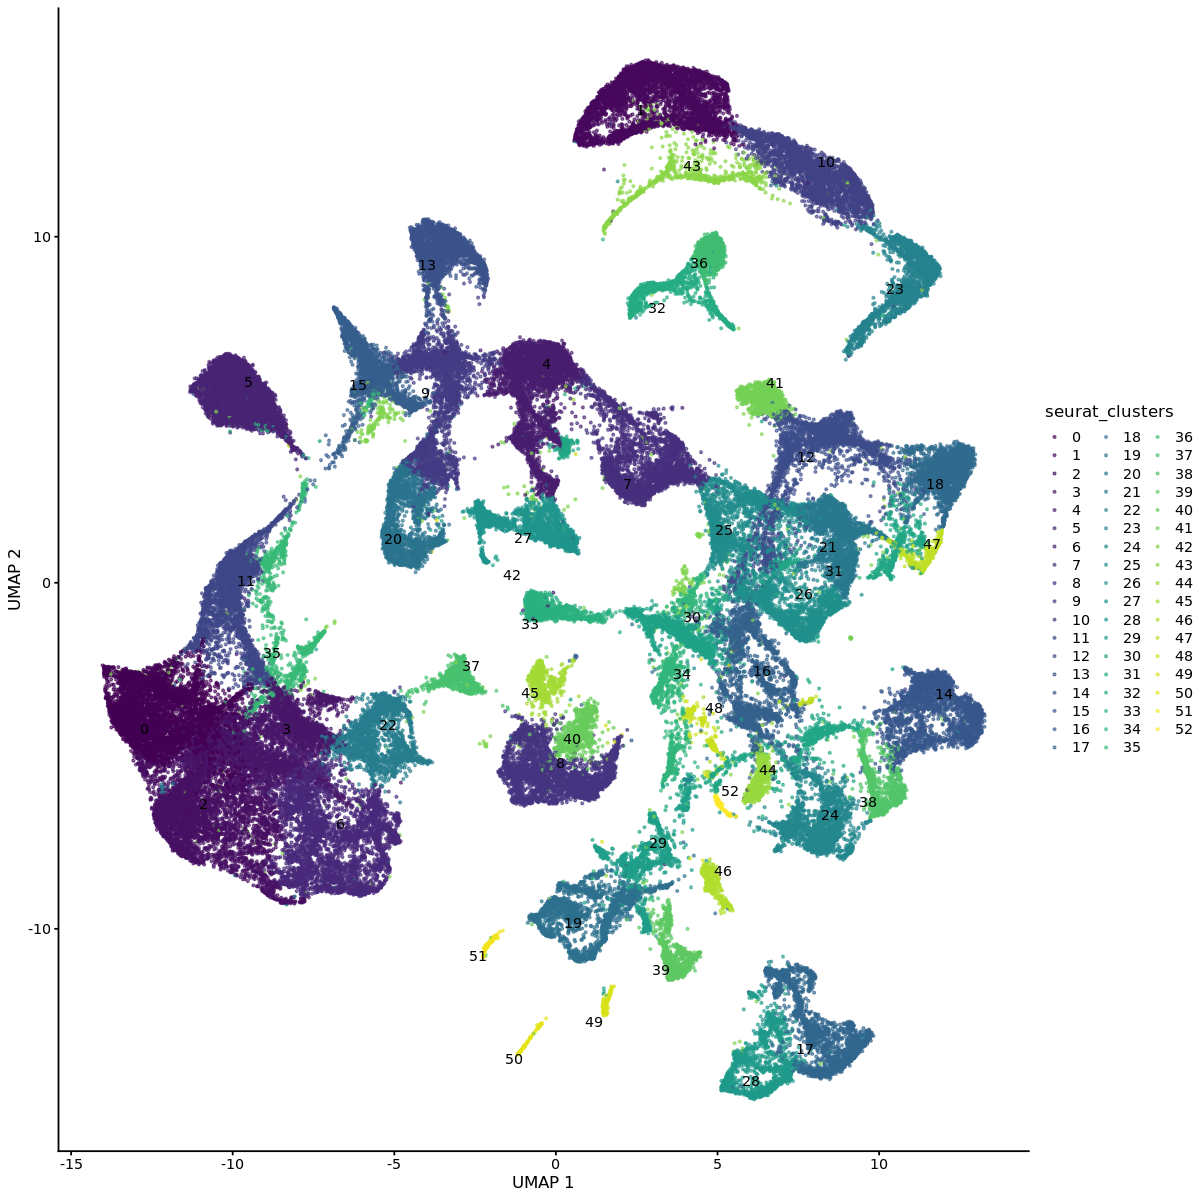

In [690]:
umap_pl

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



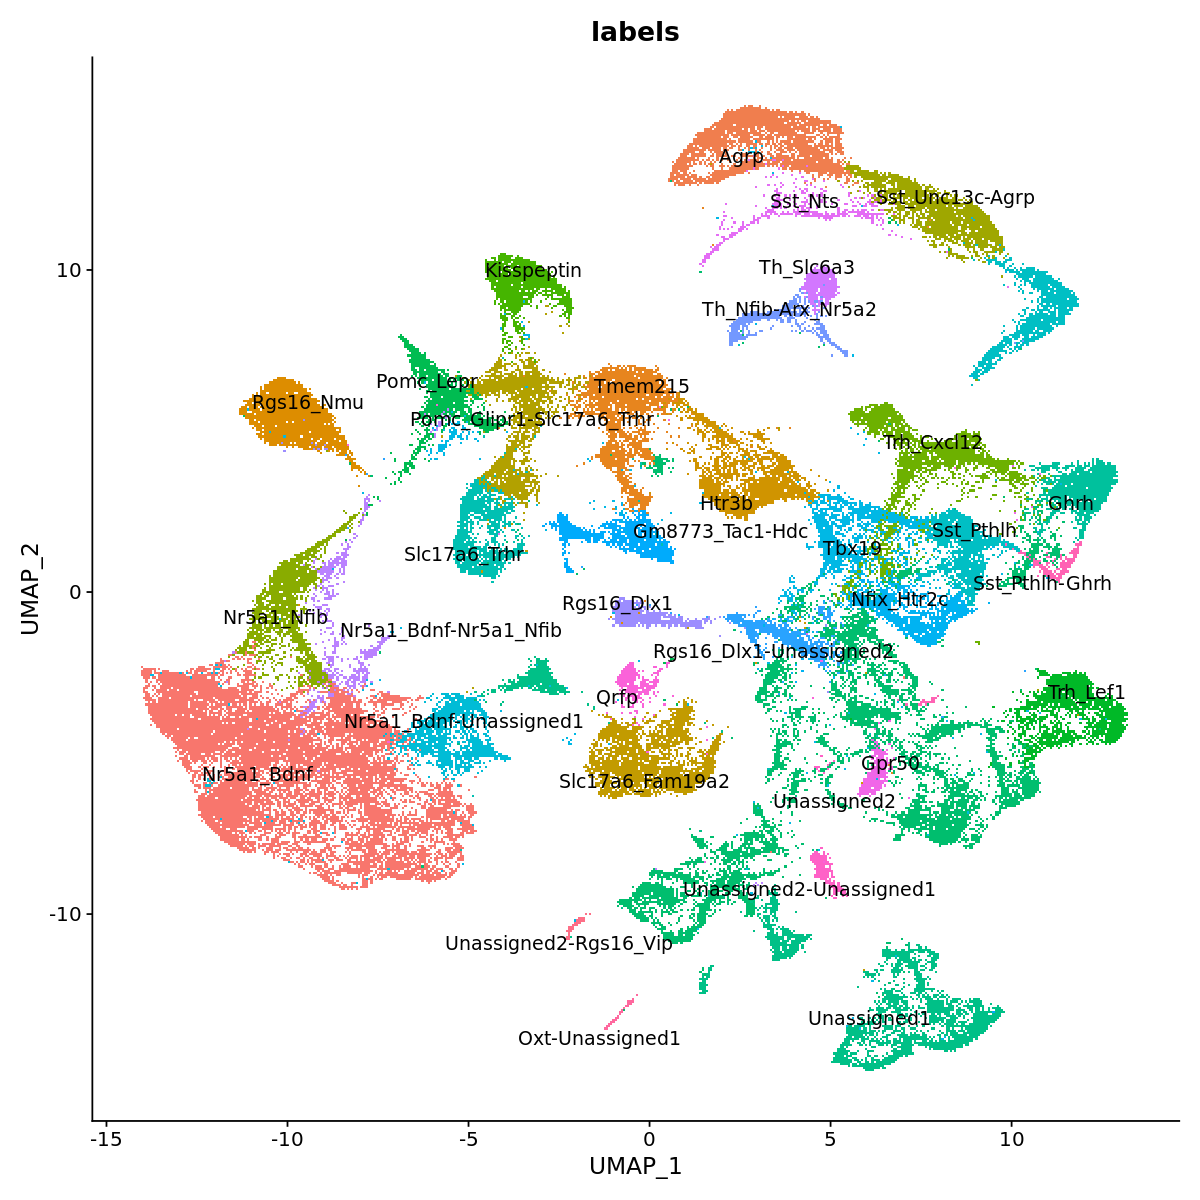

In [716]:
options(repr.plot.width=10, repr.plot.height=10)
umap_plot = DimPlot(obj, reduction = "umap", group.by = "labels", label = TRUE,  repel = TRUE) + NoLegend()
umap_plot

In [717]:
nh_graph_pl <- plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2)) 

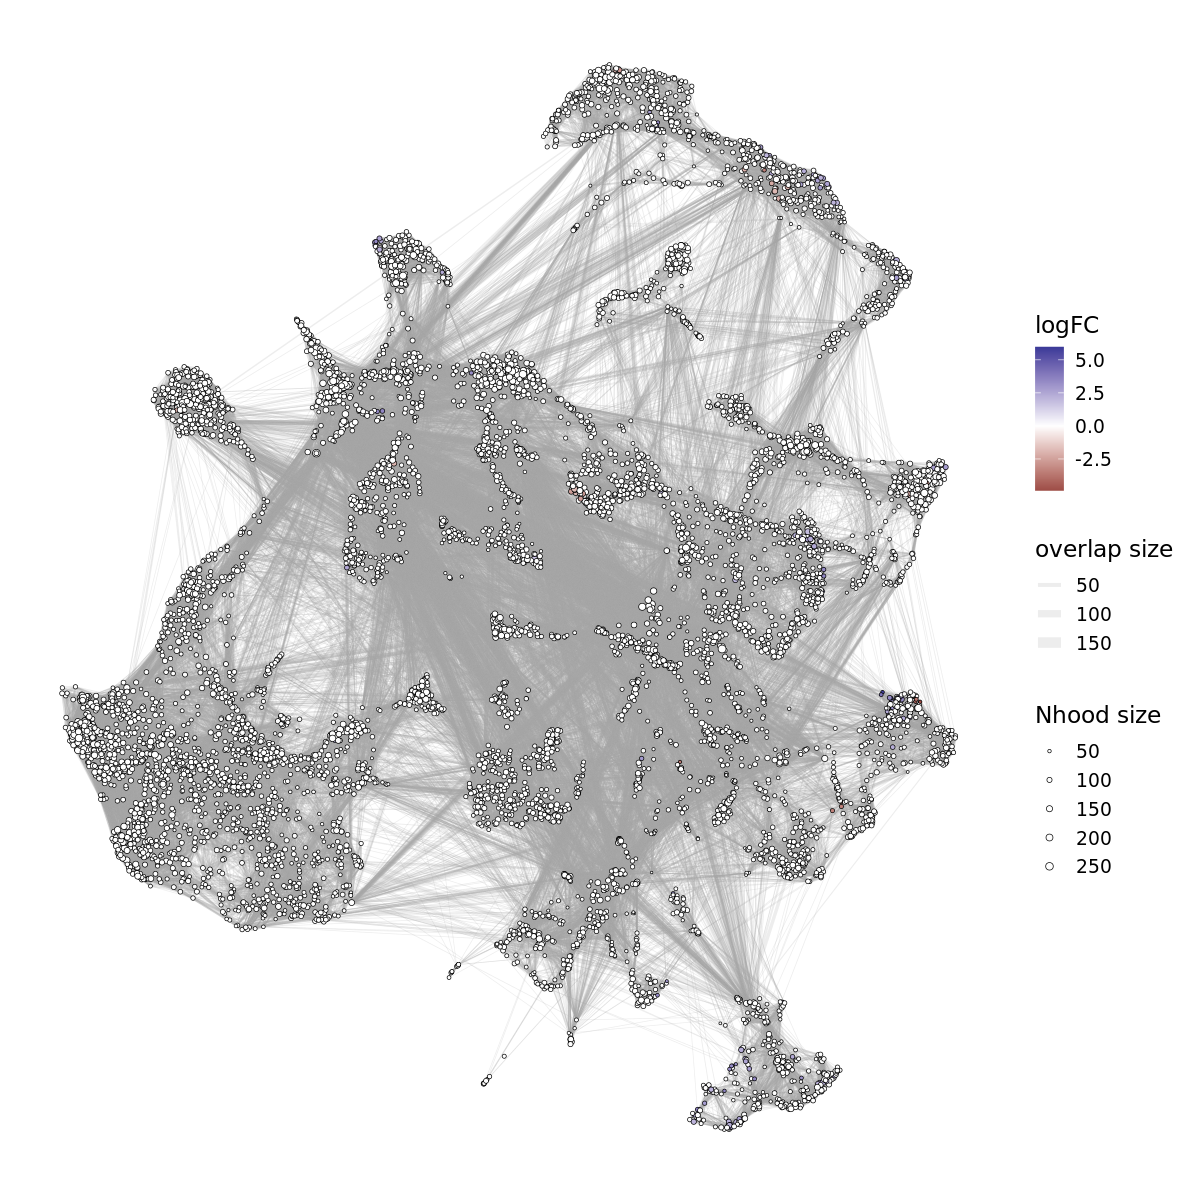

In [718]:
plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2), ) 

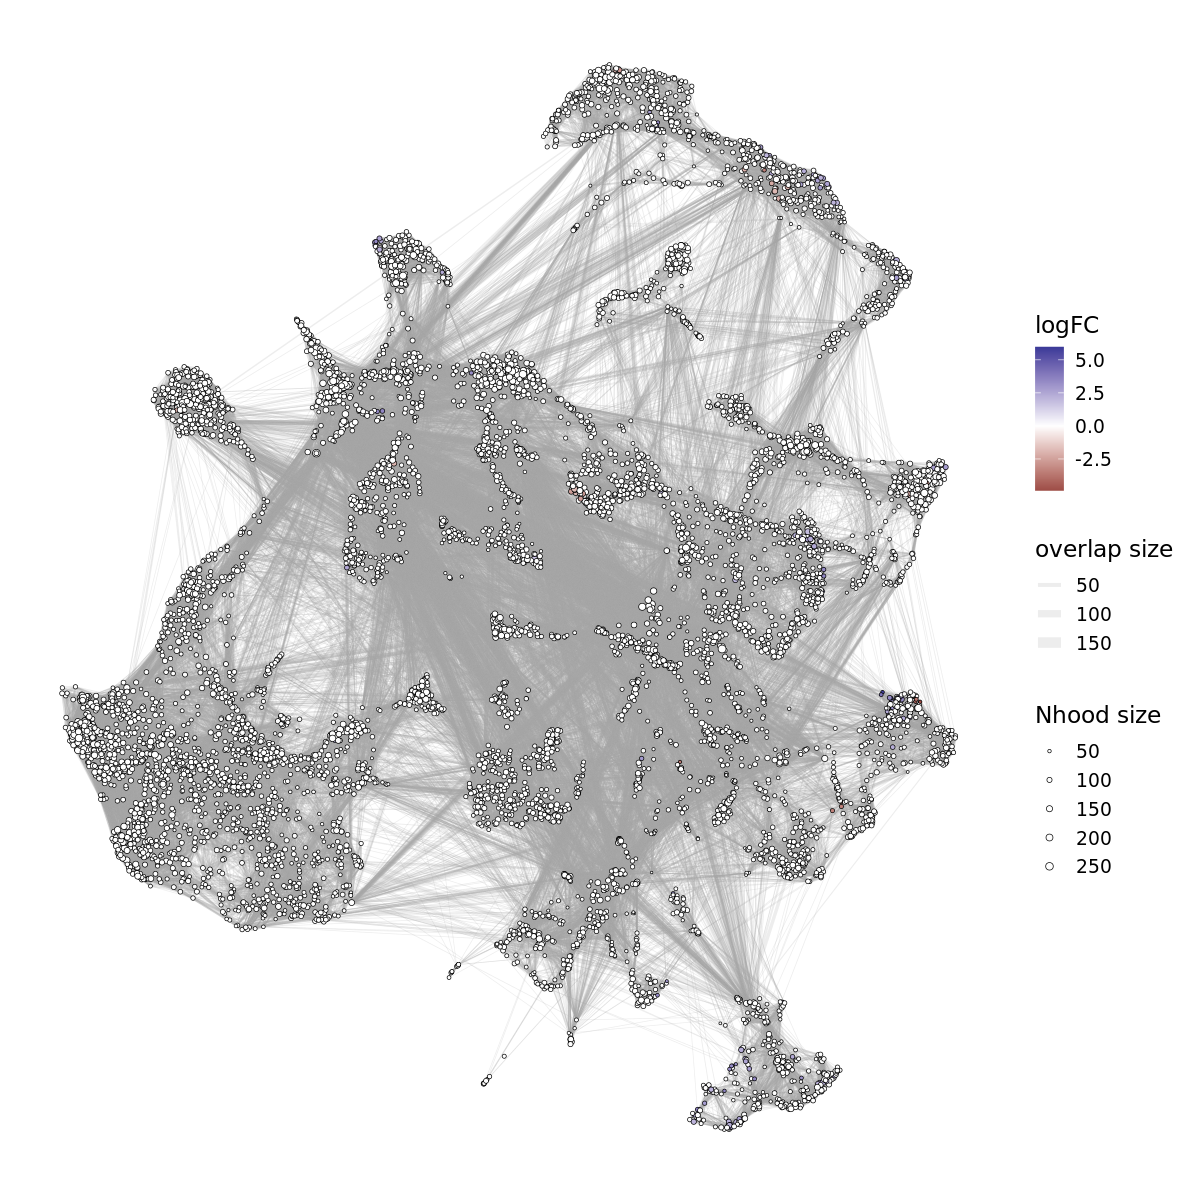

In [719]:
options(repr.plot.width=10, repr.plot.height=10)
plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2)) 

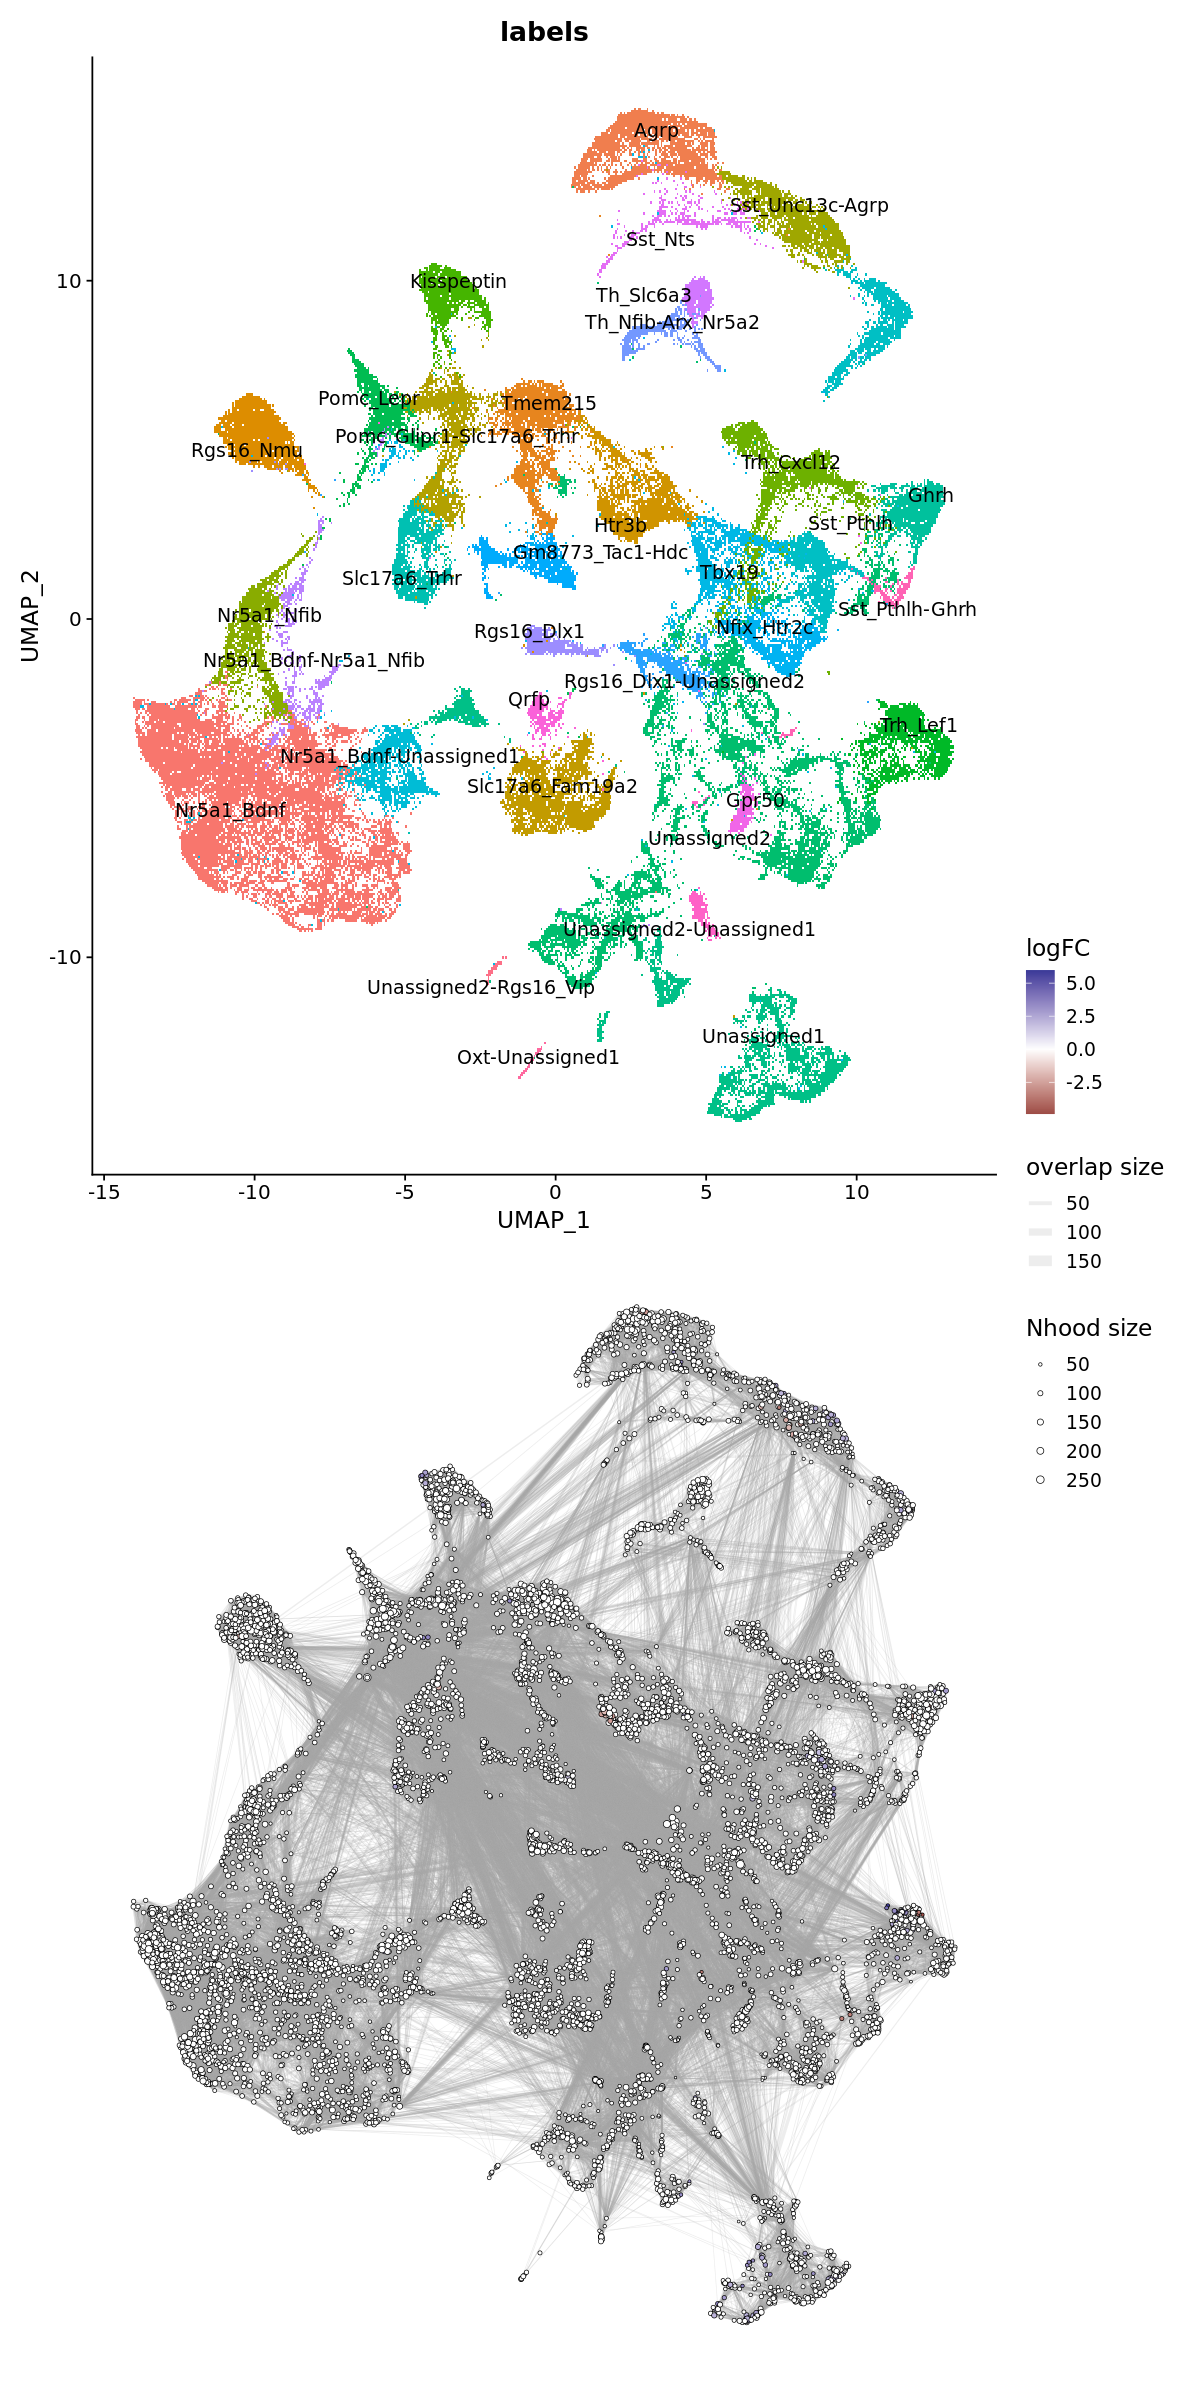

In [720]:
options(repr.plot.width=10, repr.plot.height=20)
umap_plot / nh_graph_pl +
  plot_layout(guides="collect")

In [721]:
da_results <- annotateNhoods(obob_milo, da_results, coldata_col = "labels")
head(da_results)

logFC      logCPM   F         PValue     FDR       Nhood SpatialFDR seurat_clusters seurat_clusters_fraction
1  0.8701011 8.258100 2.4712749 0.11803802 0.5189554 1     0.5383458  26              1.000000                
2  1.4141979 7.866893 4.6889635 0.03202607 0.3028027 2     0.3230503  17              1.000000                
3  0.4074192 8.368826 0.6911096 0.40710060 0.7889315 3     0.7974595  36              1.000000                
4  0.3916101 7.705426 0.4003523 0.52786490 0.8602658 4     0.8656202  33              1.000000                
5 -0.3712540 8.042283 0.3828979 0.53698930 0.8650866 5     0.8700116  5               1.000000                
6 -0.9796736 7.748047 1.5657206 0.21300146 0.6403894 6     0.6545505  31              0.739726                
  labels      labels_fraction
1 Nfix_Htr2c  1.0000000      
2 Unassigned1 1.0000000      
3 Th_Slc6a3   1.0000000      
4 Rgs16_Dlx1  1.0000000      
5 Rgs16_Nmu   1.0000000      
6 Unassigned2 0.9726027

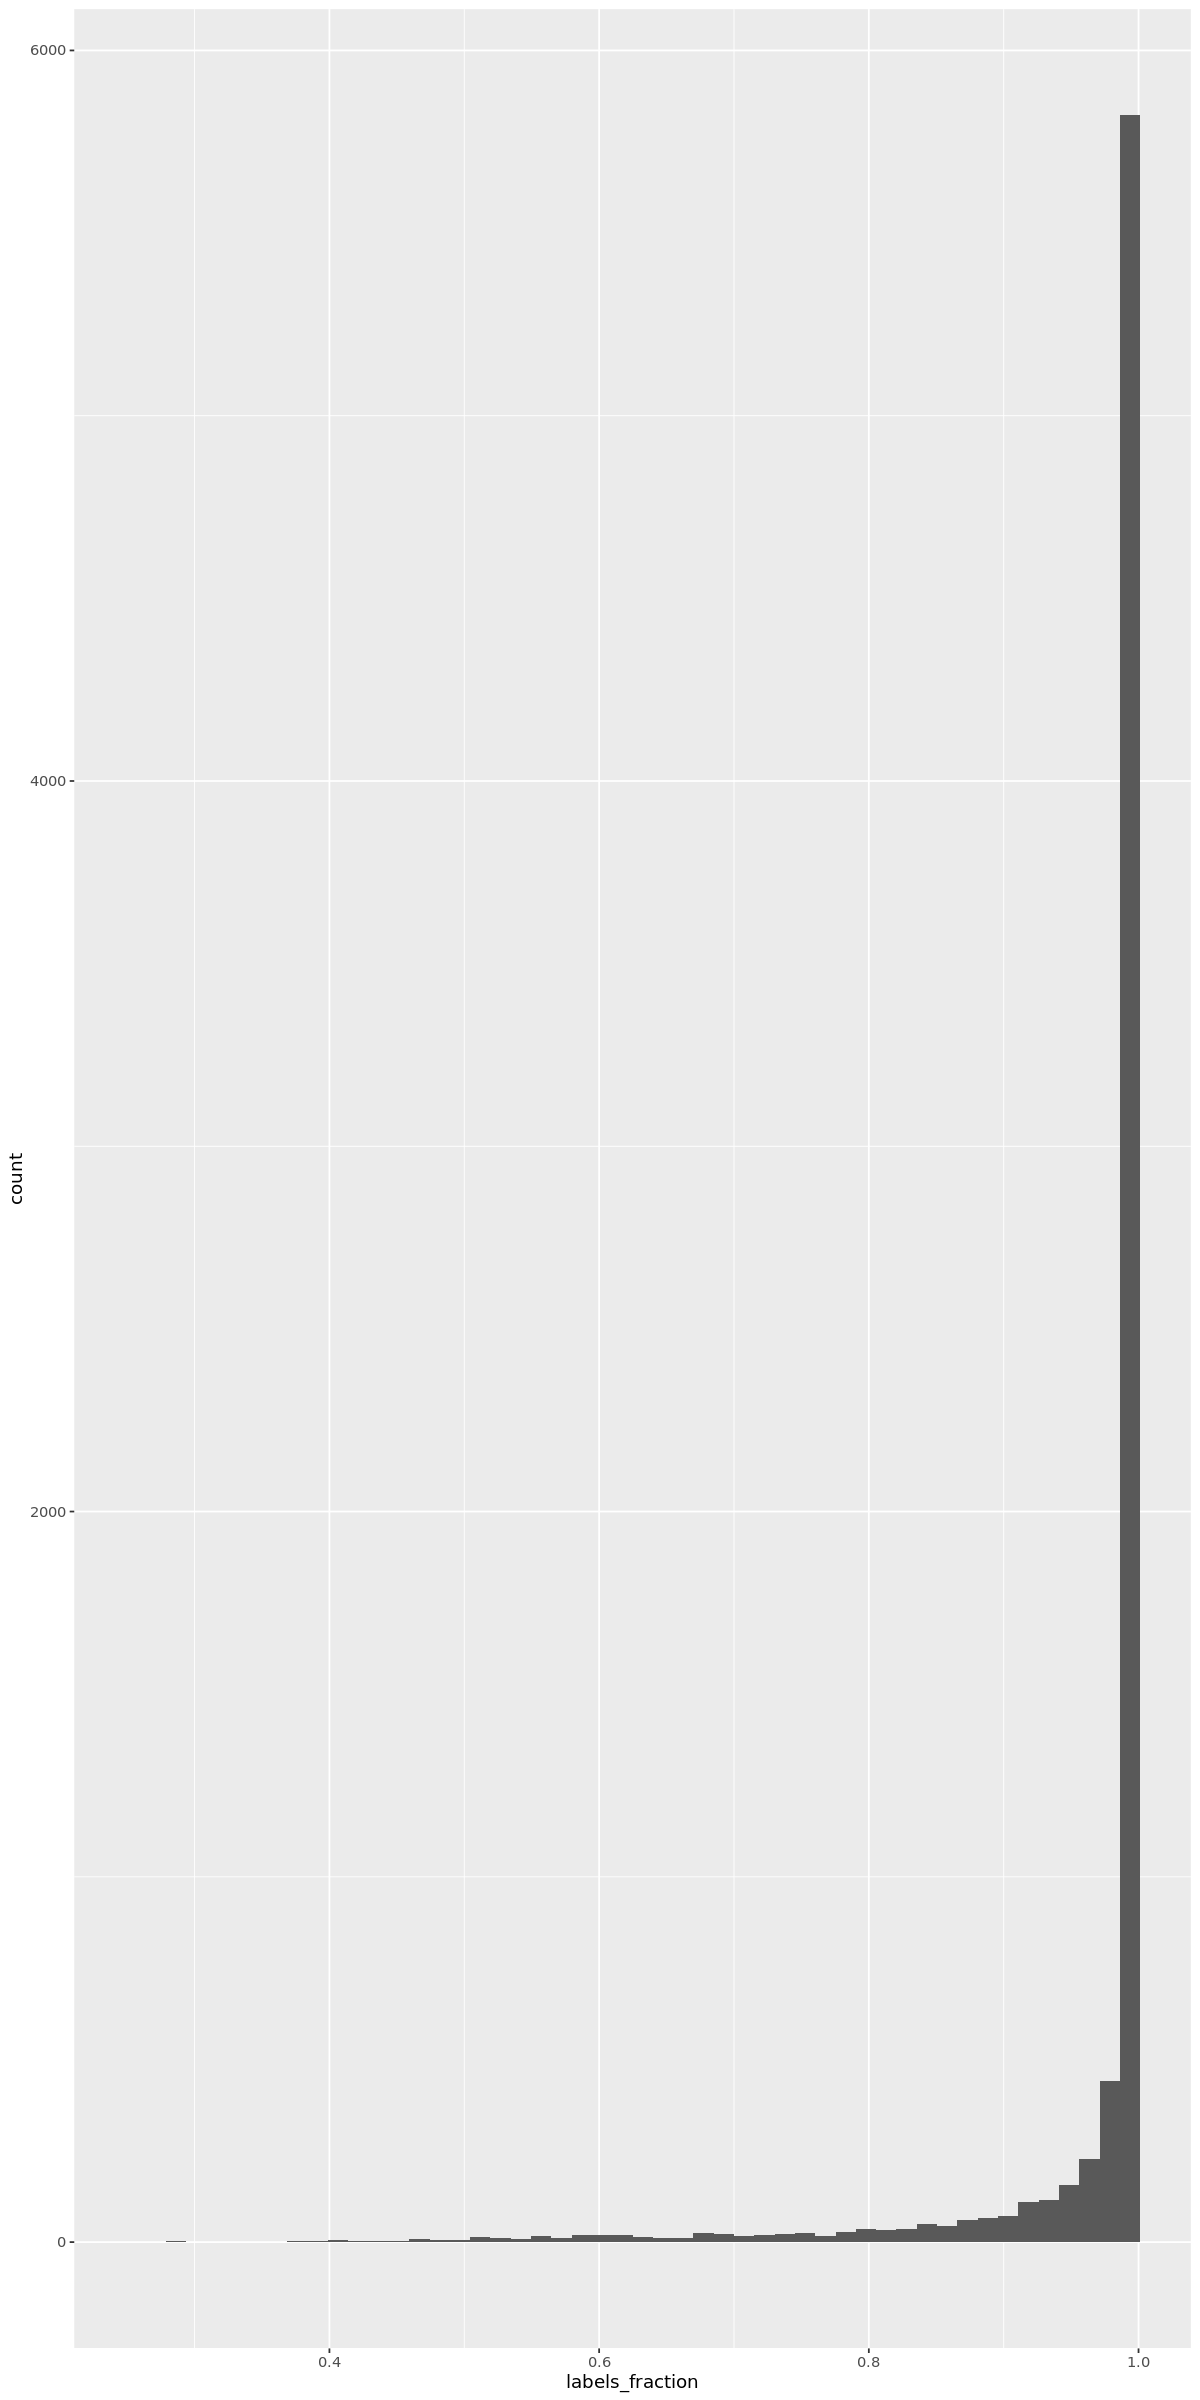

In [722]:
#we want to set a threshold to exclude neighbourhoods with a mix of cell types
ggplot(da_results, aes(labels_fraction)) + geom_histogram(bins=50)

In [723]:
da_results$labels <- ifelse(da_results$labels_fraction < 0.7, "Mixed", da_results$labels)

In [724]:
all_nhood = da_results %>%
group_by(labels) %>% 
summarise(n = n()) %>%
arrange(desc(n))

sig_nhood = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("significant" = "n")


sig_up = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
filter(.[['logFC']] > 0) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("up" = "n") %>%
tidyr::complete()

sig_down = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
filter(.[['logFC']] < 0) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("down" = "n") %>%
tidyr::complete()

nhood_summary = plyr::join_all(list(all_nhood, sig_nhood, sig_up, sig_down), by = 'labels')
nhood_summary = nhood_summary %>% arrange(n)
# nhood_summary = nhood_summary %>% arrange(significant)
nhood_summary$labels = factor(nhood_summary$labels, levels=nhood_summary$labels)
nhood_summary = nhood_summary %>% tidyr::pivot_longer(c("up", "down"), names_to="direction", values_to="n_nhoods")

In [726]:
nhood_summary$labels

[1] Oxt-Unassigned1          Oxt-Unassigned1          Unassigned2-Rgs16_Vip    Unassigned2-Rgs16_Vip   
 [5] Sst_Pthlh-Ghrh           Sst_Pthlh-Ghrh           Unassigned2-Unassigned1  Unassigned2-Unassigned1 
 [9] Qrfp                     Qrfp                     Sst_Nts                  Sst_Nts                 
[13] Gpr50                    Gpr50                    Th_Slc6a3                Th_Slc6a3               
[17] Rgs16_Dlx1               Rgs16_Dlx1               Nr5a1_Bdnf-Nr5a1_Nfib    Nr5a1_Bdnf-Nr5a1_Nfib   
[21] Th_Nfib-Arx_Nr5a2        Th_Nfib-Arx_Nr5a2        Rgs16_Dlx1-Unassigned2   Rgs16_Dlx1-Unassigned2  
[25] Nfix_Htr2c               Nfix_Htr2c               Nr5a1_Bdnf-Unassigned1   Nr5a1_Bdnf-Unassigned1  
[29] Gm8773_Tac1-Hdc          Gm8773_Tac1-Hdc          Ghrh                     Ghrh                    
[33] Pomc_Lepr                Pomc_Lepr                Slc17a6_Trhr             Slc17a6_Trhr            
[37] Kisspeptin               Kisspeptin               Tbx19                    Tbx19                   
[41] Pomc_Glipr1-Slc17a6_Trhr Pomc_Glipr1-Slc17a6_Trhr Trh_Lef1                 Trh_Lef1                
[45] Nr5a1_Nfib               Nr5a1_Nfib               Sst_Unc13c-Agrp          Sst_Unc13c-Agrp         
[49] Trh_Cxcl12               Trh_Cxcl12               Htr3b                    Htr3b                   
[53] Mixed                    Mixed                    Tmem215                  Tmem215                 
[57] Rgs16_Nmu                Rgs16_Nmu                Agrp                     Agrp                    
[61] Slc17a6_Fam19a2          Slc17a6_Fam19a2          Sst_Pthlh                Sst_Pthlh               
[65] Unassigned1              Unassigned1              Unassigned2              Unassigned2             
[69] Nr5a1_Bdnf               Nr5a1_Bdnf              
35 Levels: Oxt-Unassigned1 Unassigned2-Rgs16_Vip Sst_Pthlh-Ghrh Unassigned2-Unassigned1 Qrfp Sst_Nts ... Nr5a1_Bdnf

In [727]:
dput(levels(nhood_summary$labels))

c("Oxt-Unassigned1", "Unassigned2-Rgs16_Vip", "Sst_Pthlh-Ghrh", 
"Unassigned2-Unassigned1", "Qrfp", "Sst_Nts", "Gpr50", "Th_Slc6a3", 
"Rgs16_Dlx1", "Nr5a1_Bdnf-Nr5a1_Nfib", "Th_Nfib-Arx_Nr5a2", "Rgs16_Dlx1-Unassigned2", 
"Nfix_Htr2c", "Nr5a1_Bdnf-Unassigned1", "Gm8773_Tac1-Hdc", "Ghrh", 
"Pomc_Lepr", "Slc17a6_Trhr", "Kisspeptin", "Tbx19", "Pomc_Glipr1-Slc17a6_Trhr", 
"Trh_Lef1", "Nr5a1_Nfib", "Sst_Unc13c-Agrp", "Trh_Cxcl12", "Htr3b", 
"Mixed", "Tmem215", "Rgs16_Nmu", "Agrp", "Slc17a6_Fam19a2", "Sst_Pthlh", 
"Unassigned1", "Unassigned2", "Nr5a1_Bdnf")


In [728]:
da_results$labels = factor(da_results$labels, levels=levels(nhood_summary$labels))

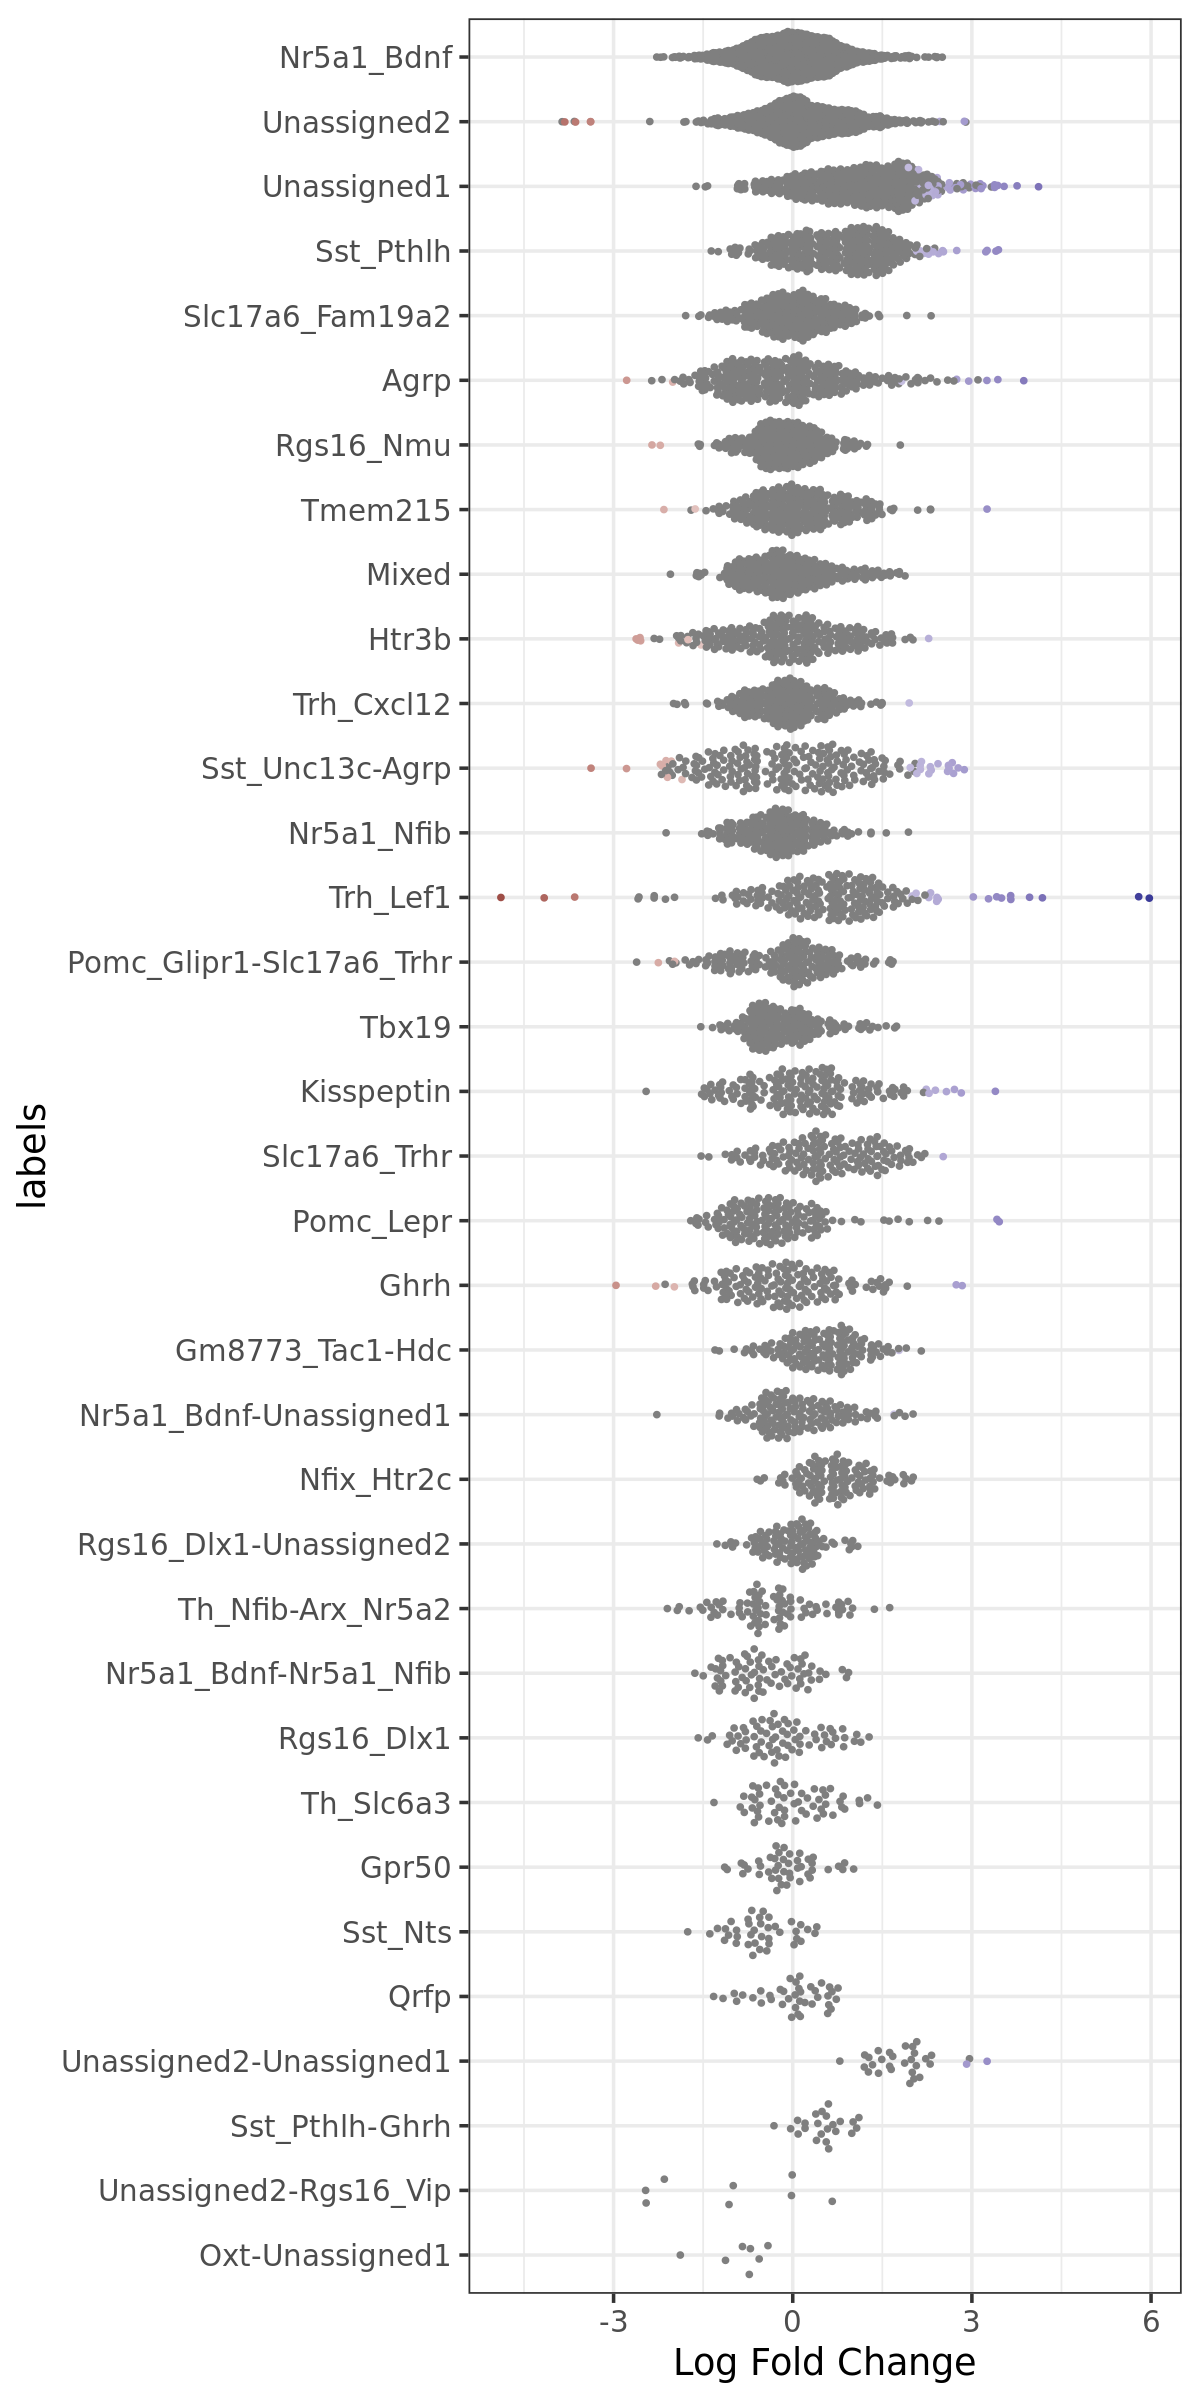

In [729]:
options(repr.plot.width=10, repr.plot.height=20)
pdab = plotDAbeeswarm(da_results, group.by = "labels", )
pdab

In [730]:
head(da_results)

logFC      logCPM   F         PValue     FDR       Nhood SpatialFDR seurat_clusters seurat_clusters_fraction
1  0.8701011 8.258100 2.4712749 0.11803802 0.5189554 1     0.5383458  26              1.000000                
2  1.4141979 7.866893 4.6889635 0.03202607 0.3028027 2     0.3230503  17              1.000000                
3  0.4074192 8.368826 0.6911096 0.40710060 0.7889315 3     0.7974595  36              1.000000                
4  0.3916101 7.705426 0.4003523 0.52786490 0.8602658 4     0.8656202  33              1.000000                
5 -0.3712540 8.042283 0.3828979 0.53698930 0.8650866 5     0.8700116  5               1.000000                
6 -0.9796736 7.748047 1.5657206 0.21300146 0.6403894 6     0.6545505  31              0.739726                
  labels      labels_fraction
1 Nfix_Htr2c  1.0000000      
2 Unassigned1 1.0000000      
3 Th_Slc6a3   1.0000000      
4 Rgs16_Dlx1  1.0000000      
5 Rgs16_Nmu   1.0000000      
6 Unassigned2 0.9726027

In [731]:
# neuron_clusters_summary = obj_neuron@meta.data %>%
#     group_by(labels) %>%
#     summarise(n = n()) %>%
#     arrange(desc(n))

In [732]:
nhood_summary = plyr::join_all(list(all_nhood, sig_nhood, sig_up, sig_down), by = 'labels')
nhood_summary = nhood_summary %>% arrange(n)
# nhood_summary = nhood_summary %>% arrange(significant)
nhood_summary$labels = factor(nhood_summary$labels, levels=nhood_summary$labels)
nhood_summary = nhood_summary %>% tidyr::pivot_longer(c("up", "down"), names_to="direction", values_to="n_nhoods")
nhood_summary

labels                   n    significant direction n_nhoods
1  Oxt-Unassigned1            7  0           up        0       
2  Oxt-Unassigned1            7  0           down      0       
3  Unassigned2-Rgs16_Vip      8  0           up        0       
4  Unassigned2-Rgs16_Vip      8  0           down      0       
5  Sst_Pthlh-Ghrh            23  0           up        0       
6  Sst_Pthlh-Ghrh            23  0           down      0       
7  Unassigned2-Unassigned1   30  2           up        2       
8  Unassigned2-Unassigned1   30  2           down      0       
9  Qrfp                      39  0           up        0       
10 Qrfp                      39  0           down      0       
11 Sst_Nts                   39  0           up        0       
12 Sst_Nts                   39  0           down      0       
13 Gpr50                     44  0           up        0       
14 Gpr50                     44  0           down      0       
15 Th_Slc6a3                 56  0           up        0       
16 Th_Slc6a3                 56  0           down      0       
17 Rgs16_Dlx1                69  0           up        0       
18 Rgs16_Dlx1                69  0           down      0       
19 Nr5a1_Bdnf-Nr5a1_Nfib     73  0           up        0       
20 Nr5a1_Bdnf-Nr5a1_Nfib     73  0           down      0       
21 Th_Nfib-Arx_Nr5a2         83  0           up        0       
22 Th_Nfib-Arx_Nr5a2         83  0           down      0       
23 Rgs16_Dlx1-Unassigned2   100  0           up        0       
24 Rgs16_Dlx1-Unassigned2   100  0           down      0       
25 Nfix_Htr2c               115  0           up        0       
26 Nfix_Htr2c               115  0           down      0       
27 Nr5a1_Bdnf-Unassigned1   141  1           up        1       
28 Nr5a1_Bdnf-Unassigned1   141  1           down      0       
29 Gm8773_Tac1-Hdc          144  1           up        1       
30 Gm8773_Tac1-Hdc          144  1           down      0       
⋮  ⋮                        ⋮    ⋮           ⋮         ⋮       
41 Pomc_Glipr1-Slc17a6_Trhr  185  2          up         0      
42 Pomc_Glipr1-Slc17a6_Trhr  185  2          down       2      
43 Trh_Lef1                  204 20          up        17      
44 Trh_Lef1                  204 20          down       3      
45 Nr5a1_Nfib                207  0          up         0      
46 Nr5a1_Nfib                207  0          down       0      
47 Sst_Unc13c-Agrp           226 24          up        16      
48 Sst_Unc13c-Agrp           226 24          down       8      
49 Trh_Cxcl12                247  1          up         1      
50 Trh_Cxcl12                247  1          down       0      
51 Htr3b                     253  8          up         1      
52 Htr3b                     253  8          down       7      
53 Mixed                     256  0          up         0      
54 Mixed                     256  0          down       0      
55 Tmem215                   279  3          up         1      
56 Tmem215                   279  3          down       2      
57 Rgs16_Nmu                 294  2          up         0      
58 Rgs16_Nmu                 294  2          down       2      
59 Agrp                      312  8          up         6      
60 Agrp                      312  8          down       2      
61 Slc17a6_Fam19a2           314  0          up         0      
62 Slc17a6_Fam19a2           314  0          down       0      
63 Sst_Pthlh                 335 15          up        15      
64 Sst_Pthlh                 335 15          down       0      
65 Unassigned1               448 35          up        35      
66 Unassigned1               448 35          down       0      
67 Unassigned2               880  6          up         2      
68 Unassigned2               880  6          down       4      
69 Nr5a1_Bdnf               1418  0          up         0      
70 Nr5a1_Bdnf               1418  0          down       0

Scale for 'fill' is already present. Adding another scale for 'fill', which will replace the existing scale.



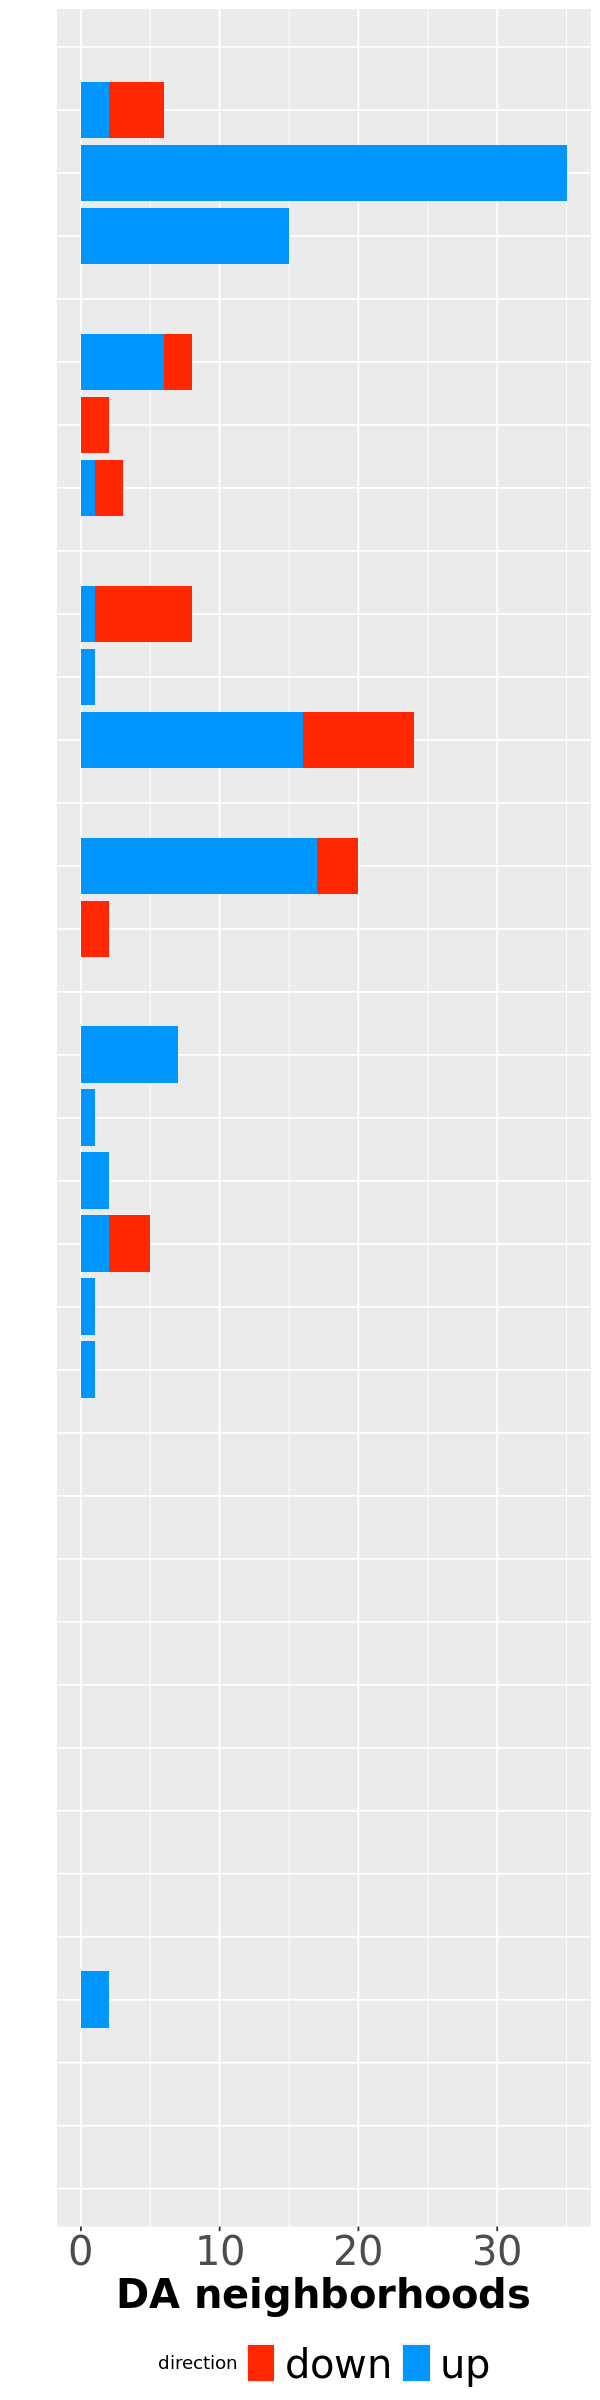

In [733]:
options(repr.plot.width=5, repr.plot.height=20)
dap = ggplot(nhood_summary, aes(fill=direction, y=labels, x=n_nhoods)) + 
    geom_bar(position="stack", stat="identity") +
    xlab("DA neighborhoods") + 
    ylab("") + 
    theme(axis.text=element_text(size=24),
          axis.title=element_text(size=24,face="bold"),
          legend.text=element_text(size=24),
          legend.position="bottom", 
                 axis.text.y=element_blank(),
         axis.ticks.y=element_blank() ) + 

    scale_fill_discrete(name = "") +
  scale_fill_manual(values=c("#FF2600",
                             "#0096FF"))

dap

In [734]:
degs = readr::read_csv('../00_preprocessing/degs_neuron.csv')

Rows: 617256 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): id, cluster_name, comparison
dbl (5): logFC, logCPM, F, PValue, FDR

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [735]:
degs = degs %>%
filter(comparison == '1*groupFGF1.Day14 -1*groupVeh_PF.Day14') %>%
filter(FDR < 0.05)
degs$cluster_name = factor(degs$cluster_name, levels=unique(nhood_summary$labels))
head(degs)

id            cluster_name comparison                             logFC      logCPM   F        PValue      
1 1500009L16Rik Tmem215      1*groupFGF1.Day14 -1*groupVeh_PF.Day14  0.5158374 6.251650 29.88323 3.000331e-06
2 Dsel          Tmem215      1*groupFGF1.Day14 -1*groupVeh_PF.Day14 -0.7380503 3.757519 26.80284 6.994066e-06
3 Grm8          Gpr50        1*groupFGF1.Day14 -1*groupVeh_PF.Day14 -0.5698491 9.774103 35.48627 3.477976e-07
  FDR        
1 0.033315677
2 0.038831052
3 0.002418585

In [736]:
nhood_summary

labels                   n    significant direction n_nhoods
1  Oxt-Unassigned1            7  0           up        0       
2  Oxt-Unassigned1            7  0           down      0       
3  Unassigned2-Rgs16_Vip      8  0           up        0       
4  Unassigned2-Rgs16_Vip      8  0           down      0       
5  Sst_Pthlh-Ghrh            23  0           up        0       
6  Sst_Pthlh-Ghrh            23  0           down      0       
7  Unassigned2-Unassigned1   30  2           up        2       
8  Unassigned2-Unassigned1   30  2           down      0       
9  Qrfp                      39  0           up        0       
10 Qrfp                      39  0           down      0       
11 Sst_Nts                   39  0           up        0       
12 Sst_Nts                   39  0           down      0       
13 Gpr50                     44  0           up        0       
14 Gpr50                     44  0           down      0       
15 Th_Slc6a3                 56  0           up        0       
16 Th_Slc6a3                 56  0           down      0       
17 Rgs16_Dlx1                69  0           up        0       
18 Rgs16_Dlx1                69  0           down      0       
19 Nr5a1_Bdnf-Nr5a1_Nfib     73  0           up        0       
20 Nr5a1_Bdnf-Nr5a1_Nfib     73  0           down      0       
21 Th_Nfib-Arx_Nr5a2         83  0           up        0       
22 Th_Nfib-Arx_Nr5a2         83  0           down      0       
23 Rgs16_Dlx1-Unassigned2   100  0           up        0       
24 Rgs16_Dlx1-Unassigned2   100  0           down      0       
25 Nfix_Htr2c               115  0           up        0       
26 Nfix_Htr2c               115  0           down      0       
27 Nr5a1_Bdnf-Unassigned1   141  1           up        1       
28 Nr5a1_Bdnf-Unassigned1   141  1           down      0       
29 Gm8773_Tac1-Hdc          144  1           up        1       
30 Gm8773_Tac1-Hdc          144  1           down      0       
⋮  ⋮                        ⋮    ⋮           ⋮         ⋮       
41 Pomc_Glipr1-Slc17a6_Trhr  185  2          up         0      
42 Pomc_Glipr1-Slc17a6_Trhr  185  2          down       2      
43 Trh_Lef1                  204 20          up        17      
44 Trh_Lef1                  204 20          down       3      
45 Nr5a1_Nfib                207  0          up         0      
46 Nr5a1_Nfib                207  0          down       0      
47 Sst_Unc13c-Agrp           226 24          up        16      
48 Sst_Unc13c-Agrp           226 24          down       8      
49 Trh_Cxcl12                247  1          up         1      
50 Trh_Cxcl12                247  1          down       0      
51 Htr3b                     253  8          up         1      
52 Htr3b                     253  8          down       7      
53 Mixed                     256  0          up         0      
54 Mixed                     256  0          down       0      
55 Tmem215                   279  3          up         1      
56 Tmem215                   279  3          down       2      
57 Rgs16_Nmu                 294  2          up         0      
58 Rgs16_Nmu                 294  2          down       2      
59 Agrp                      312  8          up         6      
60 Agrp                      312  8          down       2      
61 Slc17a6_Fam19a2           314  0          up         0      
62 Slc17a6_Fam19a2           314  0          down       0      
63 Sst_Pthlh                 335 15          up        15      
64 Sst_Pthlh                 335 15          down       0      
65 Unassigned1               448 35          up        35      
66 Unassigned1               448 35          down       0      
67 Unassigned2               880  6          up         2      
68 Unassigned2               880  6          down       4      
69 Nr5a1_Bdnf               1418  0          up         0      
70 Nr5a1_Bdnf               1418  0          down       0

In [737]:
degs_up = degs %>%
filter(logFC > 0) %>%
mutate(across("cluster_name", as.factor)) %>%
group_by(cluster_name, .drop=FALSE) %>% 
summarise(up = n())

degs_down = degs %>%
filter(logFC < 0) %>%
mutate(across("cluster_name", as.factor)) %>%
group_by(cluster_name, .drop=FALSE) %>% 
summarise(down = n())

degs_summary = plyr::join_all(list(degs_up, degs_down), by = 'cluster_name')
degs_summary = degs_summary %>% tidyr::pivot_longer(c("up", "down"), names_to="direction", values_to="n_degs")
degs_summary

cluster_name             direction n_degs
1  Oxt-Unassigned1          up        0     
2  Oxt-Unassigned1          down      0     
3  Unassigned2-Rgs16_Vip    up        0     
4  Unassigned2-Rgs16_Vip    down      0     
5  Sst_Pthlh-Ghrh           up        0     
6  Sst_Pthlh-Ghrh           down      0     
7  Unassigned2-Unassigned1  up        0     
8  Unassigned2-Unassigned1  down      0     
9  Qrfp                     up        0     
10 Qrfp                     down      0     
11 Sst_Nts                  up        0     
12 Sst_Nts                  down      0     
13 Gpr50                    up        0     
14 Gpr50                    down      1     
15 Th_Slc6a3                up        0     
16 Th_Slc6a3                down      0     
17 Rgs16_Dlx1               up        0     
18 Rgs16_Dlx1               down      0     
19 Nr5a1_Bdnf-Nr5a1_Nfib    up        0     
20 Nr5a1_Bdnf-Nr5a1_Nfib    down      0     
21 Th_Nfib-Arx_Nr5a2        up        0     
22 Th_Nfib-Arx_Nr5a2        down      0     
23 Rgs16_Dlx1-Unassigned2   up        0     
24 Rgs16_Dlx1-Unassigned2   down      0     
25 Nfix_Htr2c               up        0     
26 Nfix_Htr2c               down      0     
27 Nr5a1_Bdnf-Unassigned1   up        0     
28 Nr5a1_Bdnf-Unassigned1   down      0     
29 Gm8773_Tac1-Hdc          up        0     
30 Gm8773_Tac1-Hdc          down      0     
⋮  ⋮                        ⋮         ⋮     
41 Pomc_Glipr1-Slc17a6_Trhr up        0     
42 Pomc_Glipr1-Slc17a6_Trhr down      0     
43 Trh_Lef1                 up        0     
44 Trh_Lef1                 down      0     
45 Nr5a1_Nfib               up        0     
46 Nr5a1_Nfib               down      0     
47 Sst_Unc13c-Agrp          up        0     
48 Sst_Unc13c-Agrp          down      0     
49 Trh_Cxcl12               up        0     
50 Trh_Cxcl12               down      0     
51 Htr3b                    up        0     
52 Htr3b                    down      0     
53 Mixed                    up        0     
54 Mixed                    down      0     
55 Tmem215                  up        1     
56 Tmem215                  down      1     
57 Rgs16_Nmu                up        0     
58 Rgs16_Nmu                down      0     
59 Agrp                     up        0     
60 Agrp                     down      0     
61 Slc17a6_Fam19a2          up        0     
62 Slc17a6_Fam19a2          down      0     
63 Sst_Pthlh                up        0     
64 Sst_Pthlh                down      0     
65 Unassigned1              up        0     
66 Unassigned1              down      0     
67 Unassigned2              up        0     
68 Unassigned2              down      0     
69 Nr5a1_Bdnf               up        0     
70 Nr5a1_Bdnf               down      0

Scale for 'fill' is already present. Adding another scale for 'fill', which will replace the existing scale.



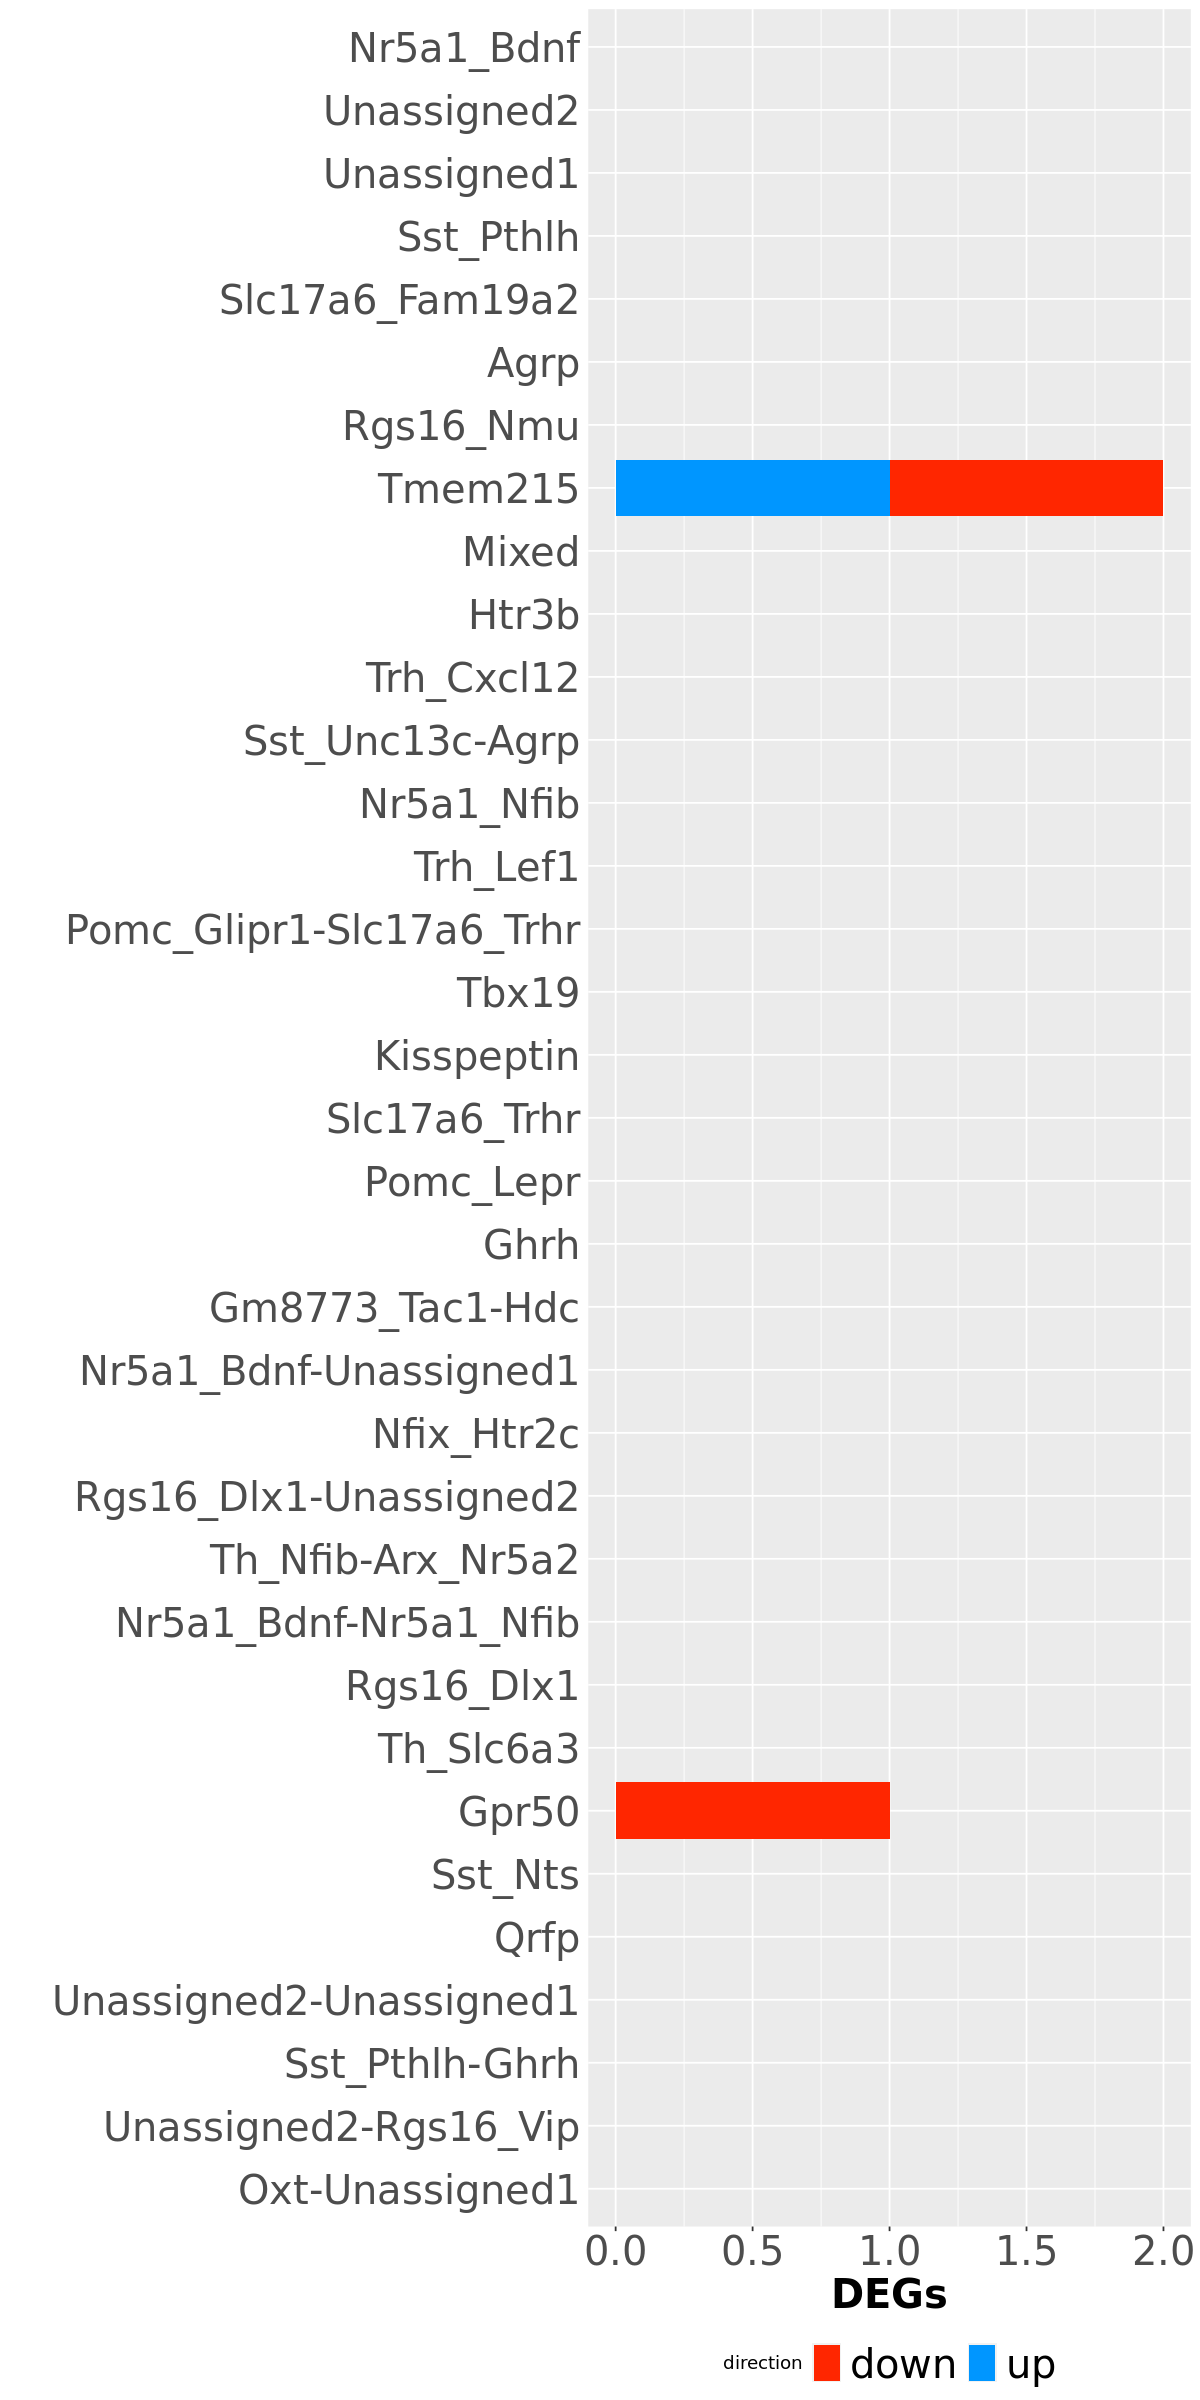

In [738]:
options(repr.plot.width=10, repr.plot.height=20)
dgp = ggplot(degs_summary, aes(fill=direction, y=cluster_name, x=n_degs)) + 
    geom_bar(position="stack", stat="identity") +
    xlab("DEGs") + 
    ylab("") + 
    theme(axis.text=element_text(size=24),
          axis.title=element_text(size=24,face="bold"),
          legend.text=element_text(size=24),
          legend.position="bottom", 
#                  axis.text.y=element_blank(),
         axis.ticks.y=element_blank() ) + 

    scale_fill_discrete(name = "")+
  scale_fill_manual(values=c("#FF2600",
                             "#0096FF"))

dgp

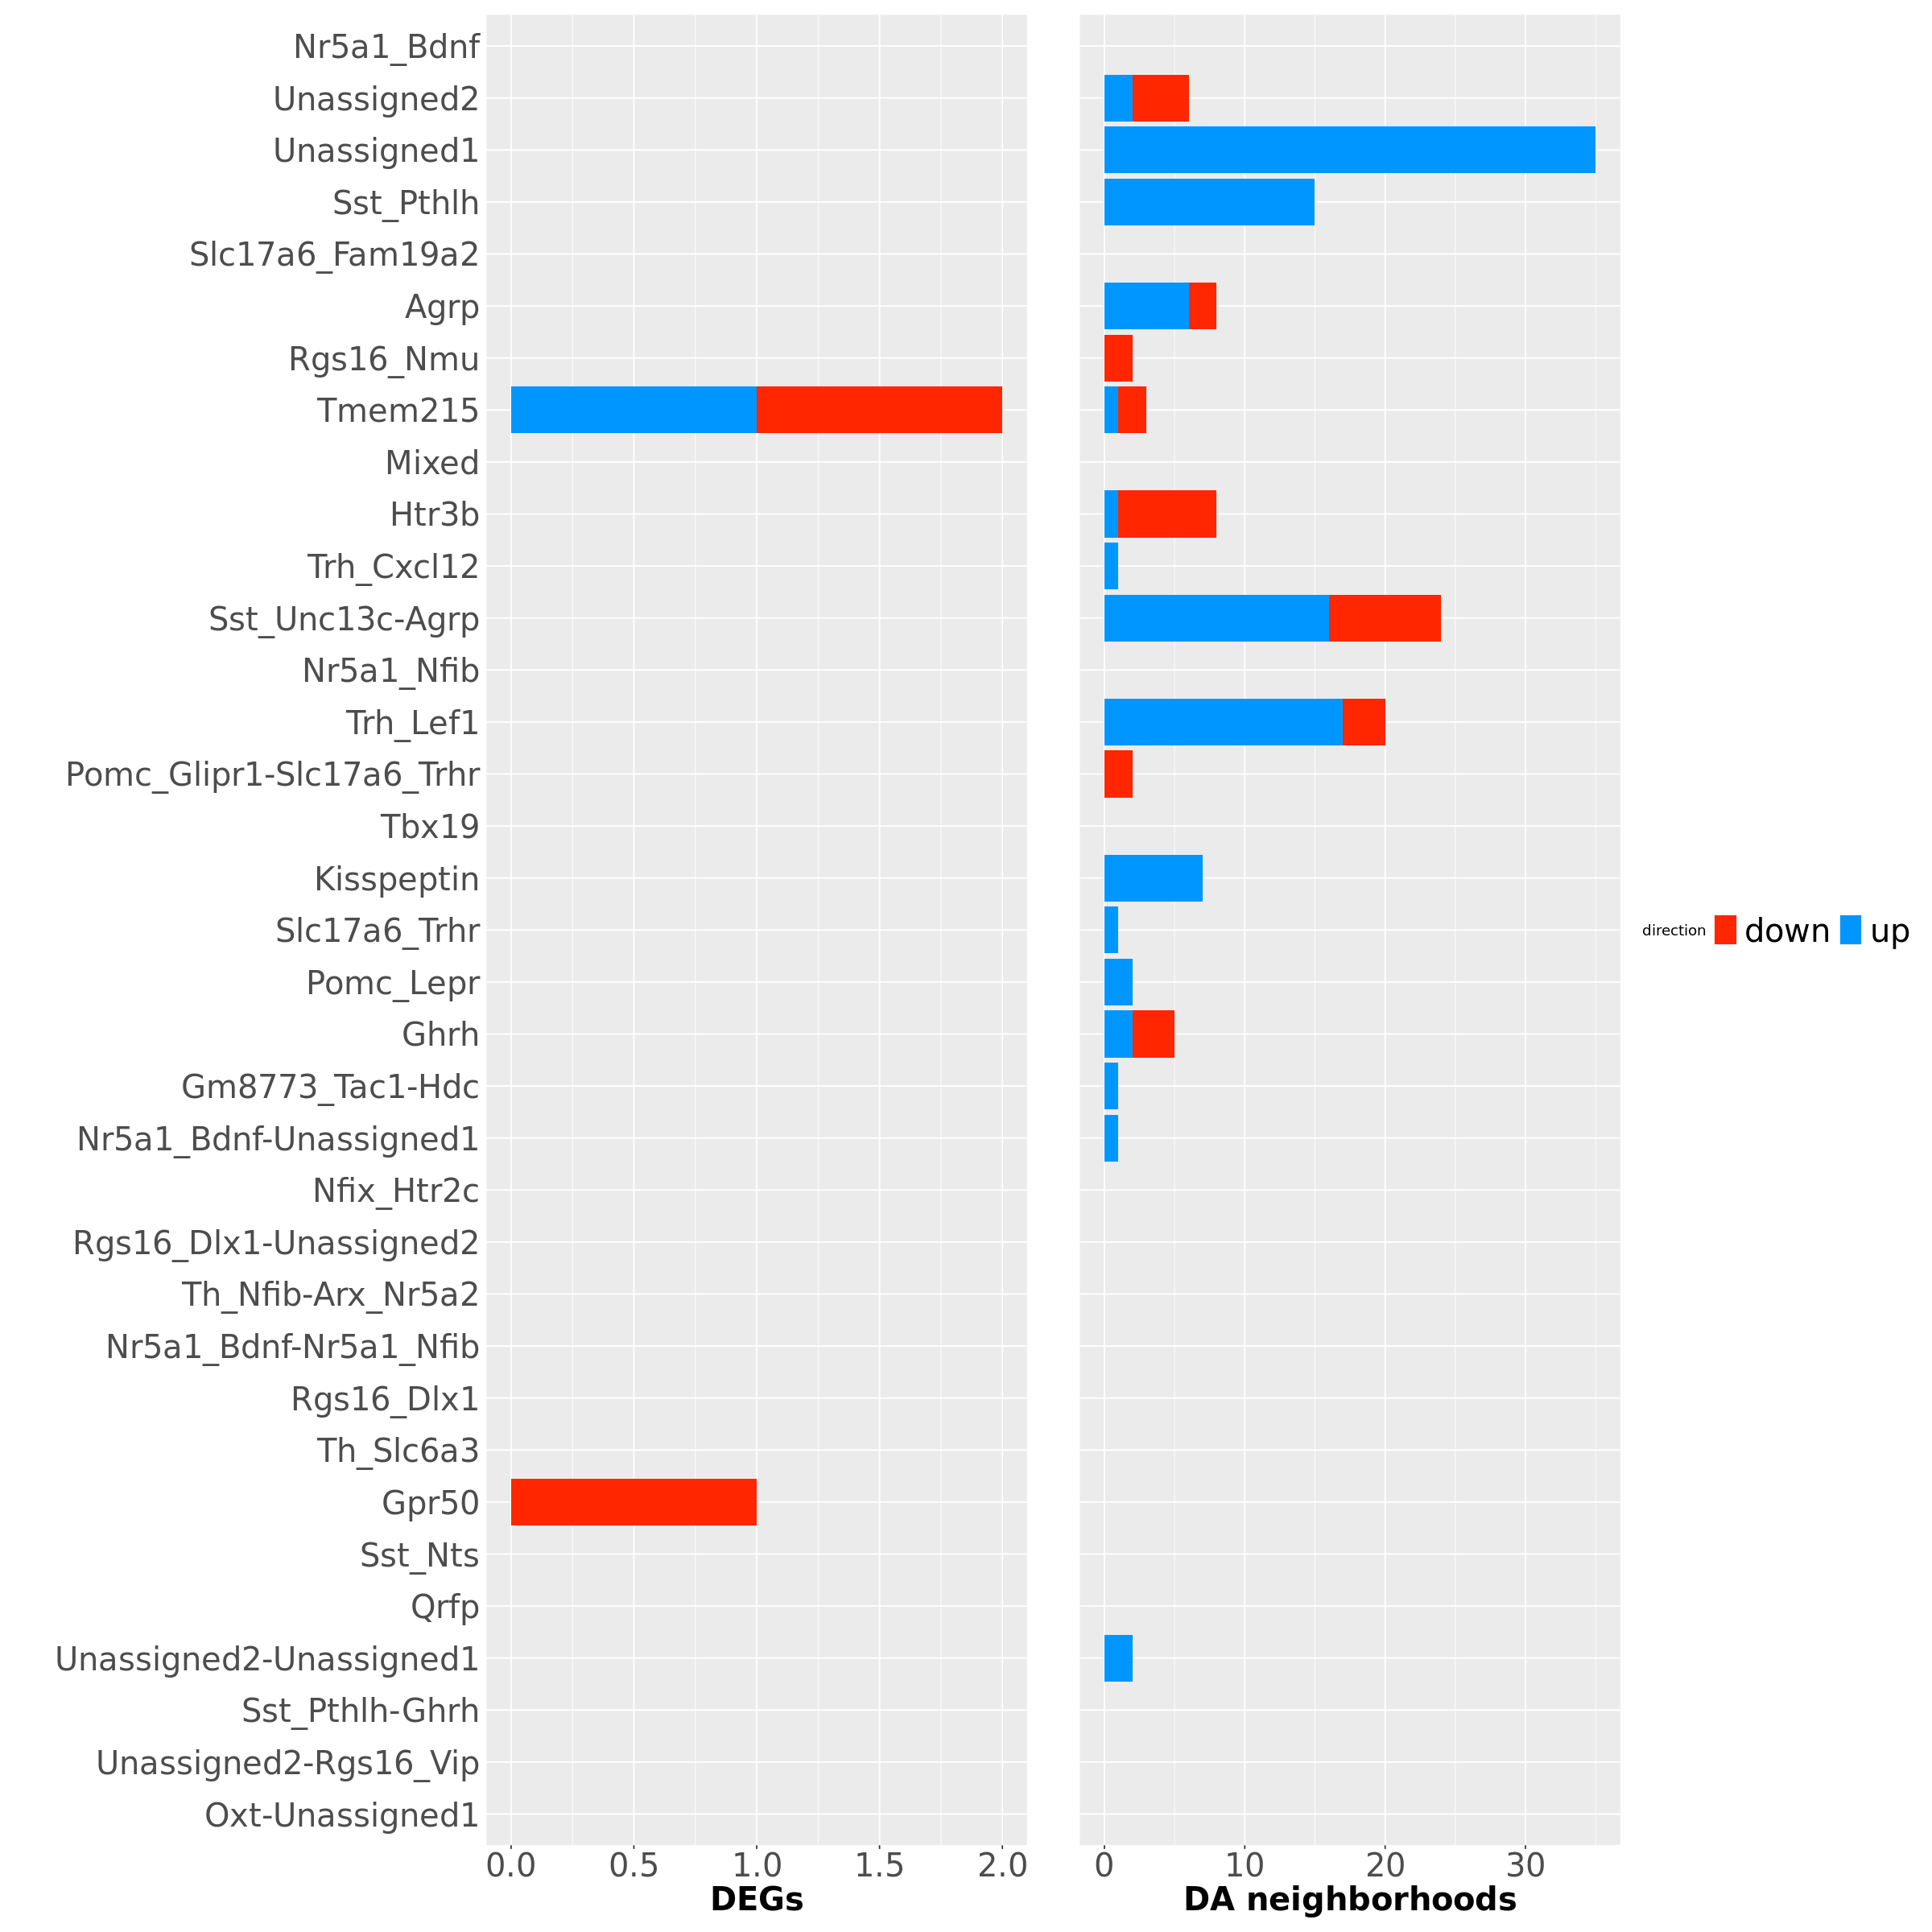

In [739]:
options(repr.plot.width=20, repr.plot.height=20)
dgp + dap +
  plot_layout(guides="collect") + theme(legend.position="bottom")

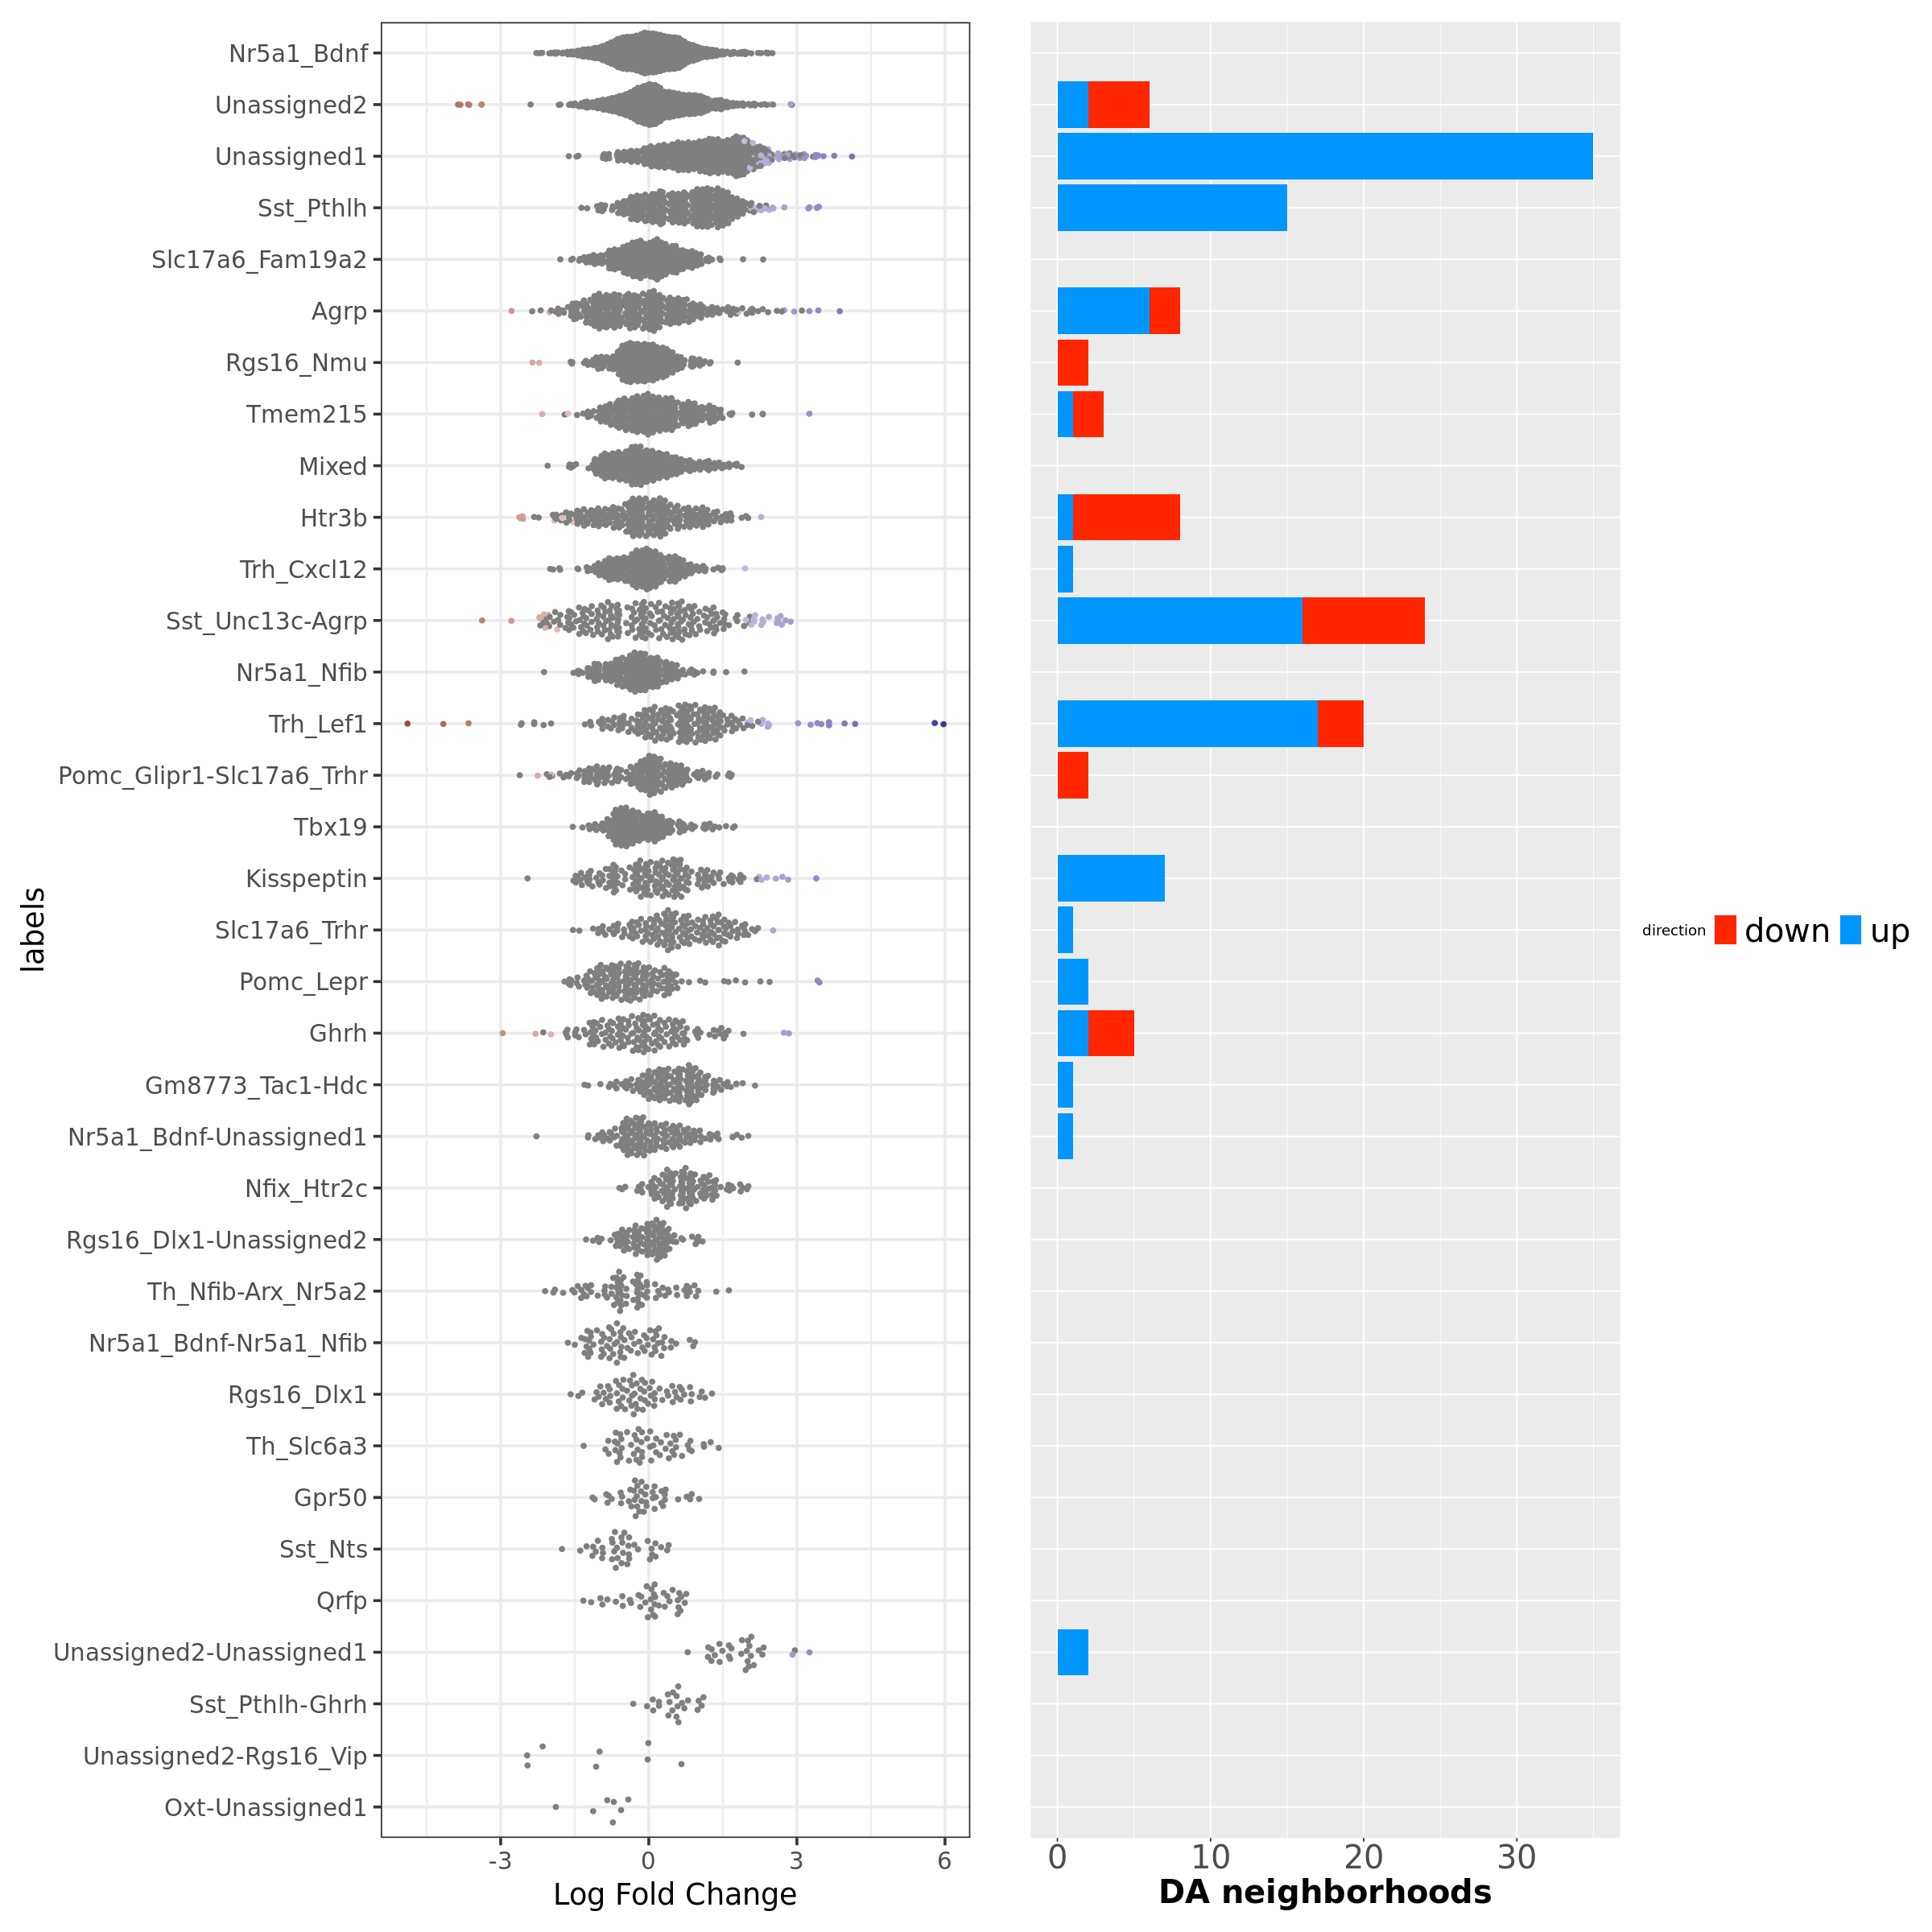

In [740]:
options(repr.plot.width=20, repr.plot.height=20)
pdab + dap +
  plot_layout(guides="collect") + theme(legend.position="bottom")

In [772]:
## Exclude zero counts genes
keep.rows <- rowSums(logcounts(obob_milo)) != 0
obob_milo <- obob_milo[keep.rows, ]

## Find HVGs
set.seed(101)
dec <- scran::modelGeneVar(obob_milo)
hvgs <- scran::getTopHVGs(dec, n=2000)
head(hvgs)

[1] "Erbb4"    "Hs3st4"   "Il1rapl2" "Cntn5"    "Nrxn3"    "Gpc6"

In [793]:
# daf = da_results %>%
# dplyr::filter(labels == "Unassigned1" &
#               SpatialFDR < 0.1 &
#               logFC > 0)
# daf$NhoodGroup = 'blah'
# daf
da_results$NhoodGroup <- as.numeric(da_results$SpatialFDR < 0.1 & da_results$logFC > 0 & da_results$labels == 'Unassigned1')
da_results$NhoodGroup = paste0(da_results$labels, '.', da_results$NhoodGroup)
head(da_results)

logFC      logCPM   F         PValue     FDR       Nhood SpatialFDR seurat_clusters seurat_clusters_fraction
1  0.8701011 8.258100 2.4712749 0.11803802 0.5189554 1     0.5383458  26              1.000000                
2  1.4141979 7.866893 4.6889635 0.03202607 0.3028027 2     0.3230503  17              1.000000                
3  0.4074192 8.368826 0.6911096 0.40710060 0.7889315 3     0.7974595  36              1.000000                
4  0.3916101 7.705426 0.4003523 0.52786490 0.8602658 4     0.8656202  33              1.000000                
5 -0.3712540 8.042283 0.3828979 0.53698930 0.8650866 5     0.8700116  5               1.000000                
6 -0.9796736 7.748047 1.5657206 0.21300146 0.6403894 6     0.6545505  31              0.739726                
  labels      labels_fraction NhoodGroup   
1 Nfix_Htr2c  1.0000000       Nfix_Htr2c.0 
2 Unassigned1 1.0000000       Unassigned1.0
3 Th_Slc6a3   1.0000000       Th_Slc6a3.0  
4 Rgs16_Dlx1  1.0000000       Rgs16_Dlx1.0 
5 Rgs16_Nmu   1.0000000       Rgs16_Nmu.0  
6 Unassigned2 0.9726027       Unassigned2.0

In [795]:
nhood_markers <- findNhoodGroupMarkers(obob_milo,
                                       da_results,
                                       subset.row=hvgs,
                                       sample_col = "hash.mcl.ID",
                                      subset.groups=c("Unassigned1.0", "Unassigned1.1"))
nhood_markers

GeneID        logFC_Unassigned1.0 adj.P.Val_Unassigned1.0 logFC_Unassigned1.1 adj.P.Val_Unassigned1.1
1    0610040F04Rik  0.012999339         7.773781e-02           -0.061470162        4.175919e-01           
2    1110019D14Rik  0.024302238         3.387432e-02            0.343898200        9.570536e-04           
3    1500009L16Rik -0.123892813         1.426658e-57           -0.024222724        7.857735e-01           
4    1600020E01Rik -0.032859829         6.482990e-04           -0.123256532        2.048652e-01           
5    1700012D14Rik -0.117609057         1.170120e-32           -0.041144360        7.106894e-01           
6    1700025G04Rik  0.119041828         2.140045e-25           -0.118803117        3.184709e-01           
7    2210408F21Rik -0.083355945         1.628946e-14            0.073545437        5.351664e-01           
8    2210408I21Rik -0.002255625         8.247964e-01            0.178626104        6.184671e-02           
9    2510009E07Rik -0.069172133         1.330265e-11           -0.118679987        2.586952e-01           
10   2610035D17Rik -0.048140275         6.201423e-06           -0.187968954        7.142772e-02           
11   2610316D01Rik -0.052108709         2.948282e-05            0.011763065        9.331152e-01           
12   2700049A03Rik -0.093658147         3.161167e-24           -0.025124025        8.136461e-01           
13   2700054A10Rik -0.004023602         6.794984e-01            0.133469867        1.544786e-01           
14   2810032G03Rik -0.113178663         9.797459e-40           -0.021898331        8.252620e-01           
15   2810403D21Rik -0.011044502         1.221121e-01            0.003769285        9.628925e-01           
16   3010001F23Rik -0.044702138         1.116970e-05           -0.168776906        9.153328e-02           
17   4732471J01Rik -0.013019131         2.127454e-01           -0.044396737        6.952156e-01           
18   4930447C04Rik  0.096075071         3.576460e-14           -0.247839553        4.384036e-02           
19   4930555F03Rik -0.530481307        1.081517e-169            0.396795796        3.245604e-02           
20   4930598N05Rik  0.259570948        5.629327e-155            0.412170206        2.911960e-06           
21   4932441J04Rik  0.087576263         2.065880e-22            0.275673799        9.300495e-04           
22   4933406I18Rik -0.049224488         2.983865e-06           -0.043282343        7.109833e-01           
23   4933412O06Rik -0.011592212         2.449624e-01            0.079264004        4.389294e-01           
24   5031425E22Rik -0.301598325        2.011631e-193           -0.246006304        1.157406e-02           
25   6030443J06Rik -0.023947941         1.883512e-02            0.104968940        3.145666e-01           
26   6030498E09Rik -0.059248059         5.533294e-26           -0.078777070        1.641961e-01           
27   8030451O07Rik  0.216696511        9.767800e-130            0.309754366        1.569384e-04           
28   9130024F11Rik -0.166132552        8.929891e-142           -0.160801920        1.029860e-02           
29   9330175M20Rik  0.252855859        3.816284e-213            0.068909755        4.235507e-01           
30   9530026P05Rik -0.534187042        8.462888e-189           -0.778536350        2.102074e-06           
⋮    ⋮             ⋮                   ⋮                       ⋮                   ⋮                      
1971 Zfp423        -0.067626063         1.590134e-09           -0.207980498        5.653405e-02           
1972 Zfp426         0.094725387         1.699191e-20           -0.112820140        2.864000e-01           
1973 Zfp438        -0.042040806         6.416789e-06            0.002707153        9.806120e-01           
1974 Zfp462         0.238824104         4.930416e-75            0.262244755        3.839348e-02           
1975 Zfp516        -0.172487208         6.848067e-79           -0.421081427        2.651034e-07           
1976 Zfp521         0.054305693         7.1454

In [808]:
nhood_markers %>%
arrange(adj.P.Val_Unassigned1.0) %>%
filter(adj.P.Val_Unassigned1.0 < 0.05) %>%
filter(logFC_Unassigned1.0 > 0)

GeneID             logFC_Unassigned1.0 adj.P.Val_Unassigned1.0 logFC_Unassigned1.1 adj.P.Val_Unassigned1.1
1   A330102I10Rik      0.3920574           0                        0.34199824         7.776154e-06           
2   Adam12             0.4803592           0                        0.59915488         1.647190e-10           
3   Adamts2            0.8665633           0                        0.74763643         4.588179e-21           
4   Adcy8              0.4773588           0                        0.51083907         1.662877e-12           
5   Apba1              0.4857128           0                        0.45486876         2.107799e-06           
6   Arpp21             0.8659845           0                        0.45265323         6.226887e-03           
7   Brinp3             0.7960491           0                        0.59660888         1.085251e-03           
8   Cacna2d1           0.9410954           0                        1.33895476         6.315011e-16           
9   Cadm2              0.7745679           0                        1.18319073         8.438690e-15           
10  Camk2d             0.5512956           0                        1.02851207         3.394182e-20           
11  Cdh10              0.6657911           0                        0.32738954         5.155012e-02           
12  Chrm3              1.6000796           0                        0.44599665         2.490565e-02           
13  Cnksr2             0.6544781           0                        1.46627941         8.305735e-27           
14  Cntnap5b           0.8569794           0                        1.33410507         3.771176e-16           
15  Crim1              0.5192572           0                        0.34241218         4.032921e-03           
16  Cux2               0.4831115           0                        0.60268751         2.134898e-11           
17  Ddc                0.3837837           0                        0.10807172         2.641520e-01           
18  Ebf3               0.2567262           0                       -0.06298162         2.766902e-01           
19  Egfem1             0.9953183           0                        1.19526974         1.583474e-08           
20  Egflam             0.2346416           0                        0.07994561         1.479470e-01           
21  Elavl2             0.7995311           0                        0.72491291         2.251201e-06           
22  ENSMUSG00000109088 0.3670287           0                        0.09617622         9.340312e-02           
23  Epha10             0.3058704           0                        0.29420549         8.708928e-06           
24  Epha7              0.5754610           0                       -0.09932497         4.218700e-01           
25  Etl4               0.7842734           0                        0.78901284         1.863339e-06           
26  Fat3               0.7971045           0                        0.56306371         7.308056e-04           
27  Fgf13              1.1578554           0                        0.84865950         7.319328e-05           
28  Foxp2              1.1661276           0                        1.69573061         5.431715e-28           
29  Fras1              0.7697854           0                        1.38455930         1.892987e-42           
30  Galntl6            1.5572565           0                        1.93173086         1.743518e-20           
⋮   ⋮                  ⋮                   ⋮                       ⋮                   ⋮                      
744 Rgs7bp             0.03055111          0.01435480               0.26692676         2.322372e-02           
745 Trpc7              0.02319383          0.01462978               0.06051080         5.558036e-01           
746 Galnt9             0.02244178          0.01634562              -0.06956651         4.794171e-01           
747 Impg2              0.01797590          0.01695989              -0.04043191         6.181578e-01           
748 D430

In [796]:
un1_markers <- nhood_markers[c("GeneID", "logFC_Unassigned1.", "adj.P.Val_1")] 
colnames(un1_markers) <- c("GeneID", "logFC", "adj.P.Val")

un1_markers[order(un1_markers$adj.P.Val), ] %>%
filter(adj.P.Val < 0.05) %>%
pull("GeneID") %>%
paste0(sep='', collapse = ' ')

ERROR: Error in `[.data.frame`(nhood_markers, c("GeneID", "logFC_1", "adj.P.Val_1")): undefined columns selected
